# Boxplots
This notebook demonstrates the functions for creating boxplots for signals from the NAB Dataset. Furthermore, it provides code to generate boxplots for temperature and pressure signals from the Weather Dataset.

In [2]:
#import libraries
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.api import OLS
from statsmodels.tsa.stattools import adfuller, kpss
from sklearn.preprocessing import StandardScaler

Necessary functions.

In [4]:
def create_vertical_boxplot_with_legend(df, column_name, file_name):
    """
    Create a vertical boxplot from a DataFrame column and add legend annotations (optional).

    Parameters:
    - df: DataFrame containing the data.
    - column_name: Name of the column for creating the boxplot.
    - title: Title for the boxplot.
    """
    #create a vertical boxplot

    plt.figure(figsize=(10, 6))
    plt.boxplot(df[column_name], vert=True)
    plt.ylabel('Value',size=12)
    plt.title(f'Boxplot of Values Over Time for {file_name}',size=14)
    plt.xticks([1], [column_name])  # X-axis label
    
    #add legend annotations
    #plt.annotate('Median', xy=(1, df[column_name].median()), xytext=(1.1, df[column_name].median() + 5), arrowprops=dict(arrowstyle='->'))
    #plt.annotate('Q1', xy=(1, df[column_name].quantile(0.25)), xytext=(1.1, df[column_name].quantile(0.25) - 5), arrowprops=dict(arrowstyle='->'))
    #plt.annotate('Q3', xy=(1, df[column_name].quantile(0.75)), xytext=(1.1, df[column_name].quantile(0.75) + 5), arrowprops=dict(arrowstyle='->'))
    plt.show()

## Create boxplots for NAB Dataset
Generate separate boxplots for each signal from the 6 collections in the dataset.

ArificialWithAnomaly collection

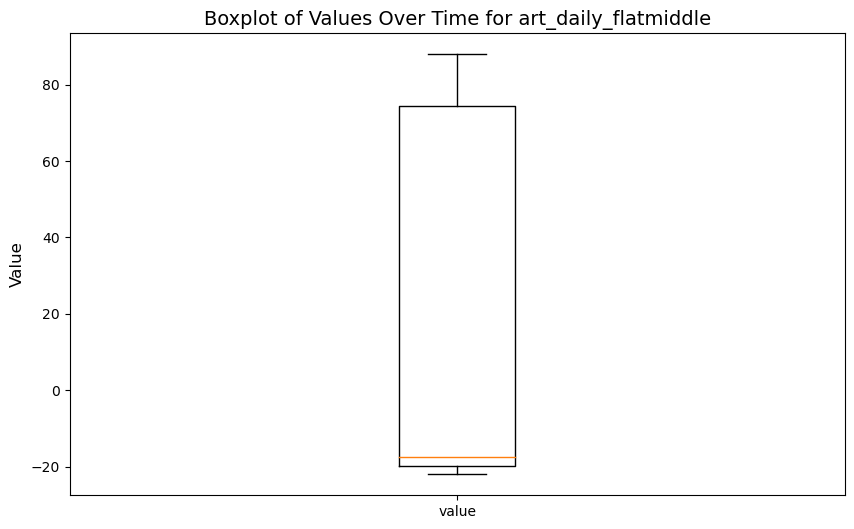

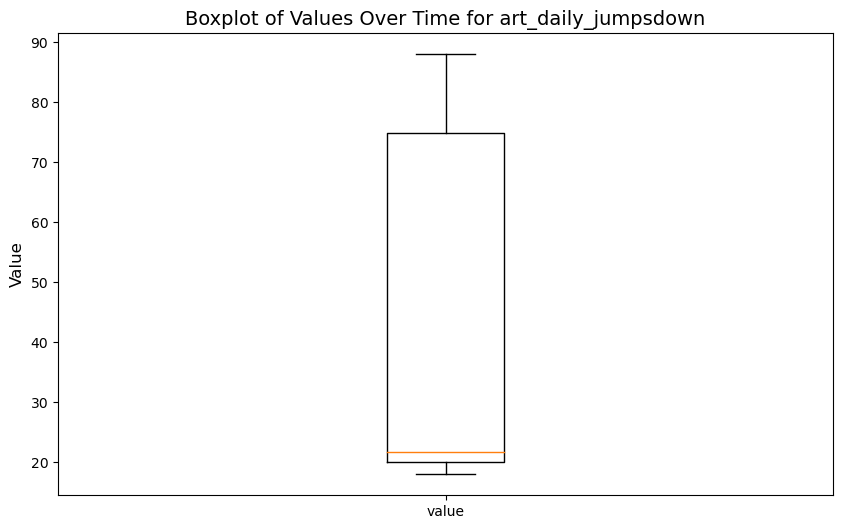

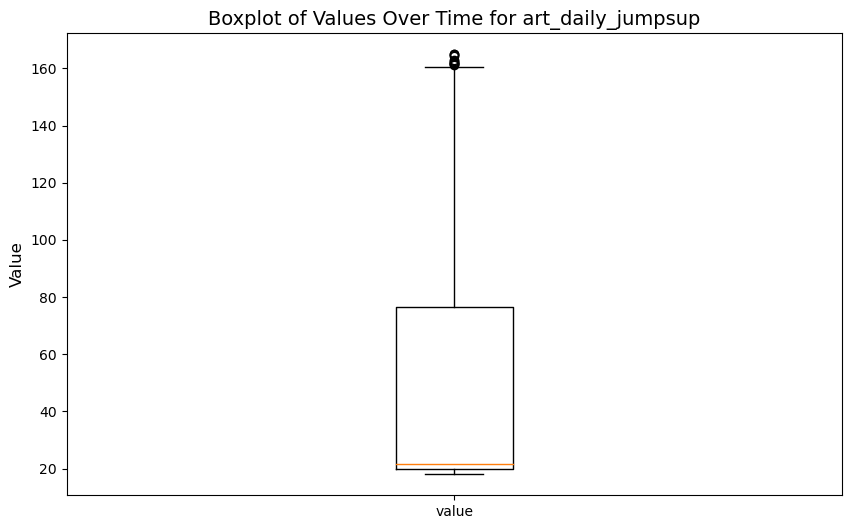

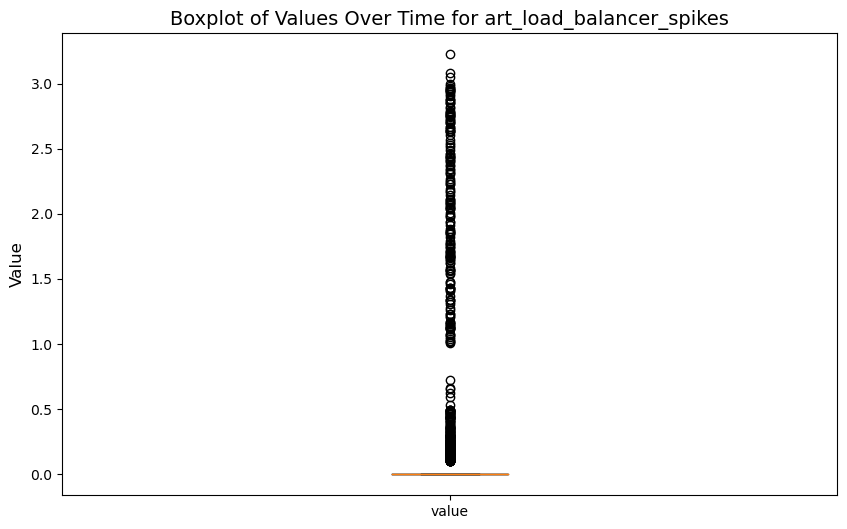

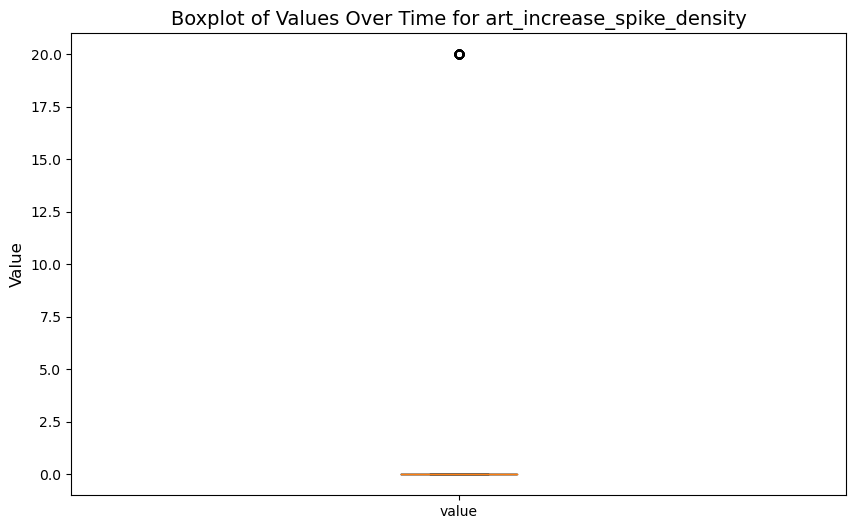

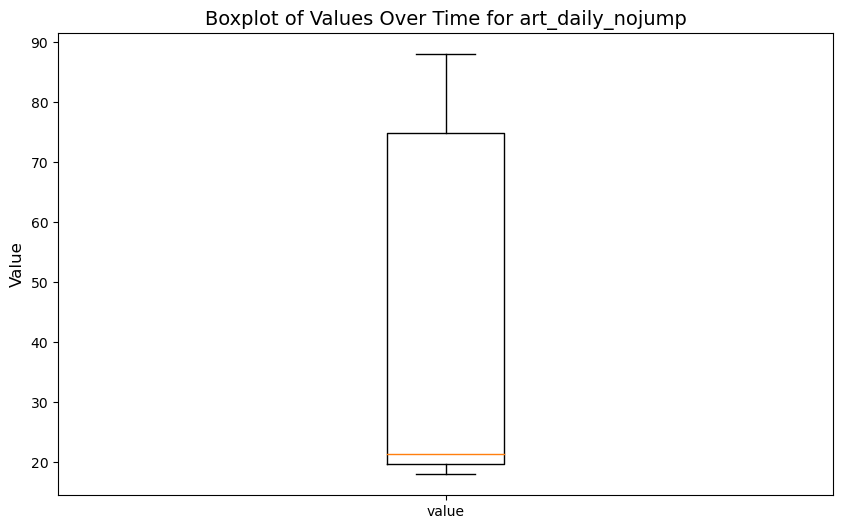

In [3]:
#become a list of file names from collection
csv_files = glob.glob("NAB/artificialWithAnomaly/*.csv")
file_names = [os.path.splitext(os.path.basename(file))[0] for file in csv_files]

#create a boxplot using a predefined function for each file in the 'file_names'.
for file_name in file_names:
    df = pd.read_csv(f'NAB/artificialWithAnomaly/{file_name}.csv')
    create_vertical_boxplot_with_legend(df, 'value', file_name)

realAdExchange collection

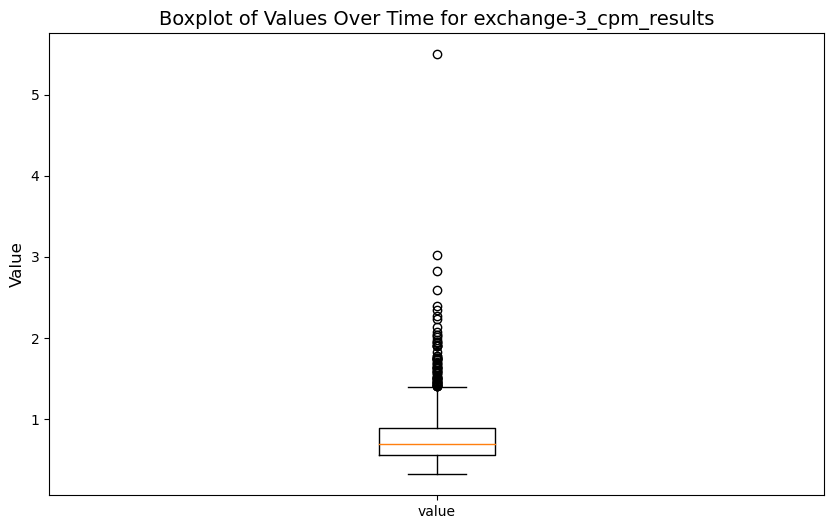

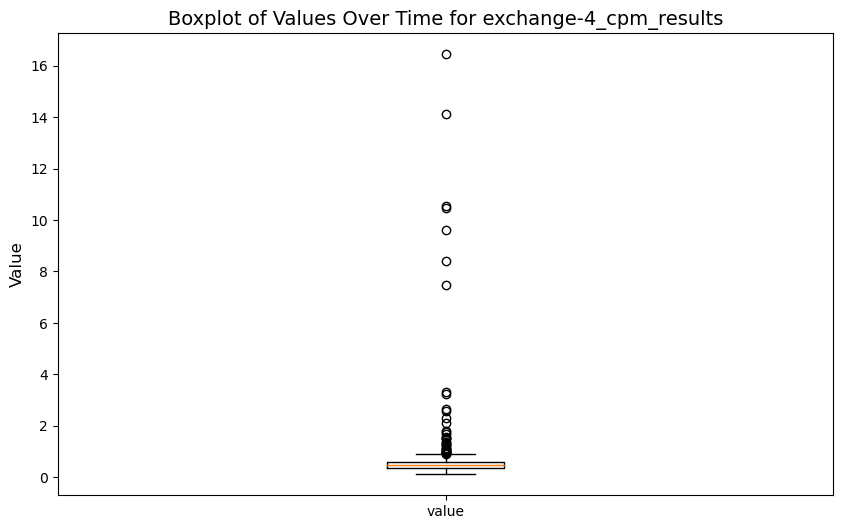

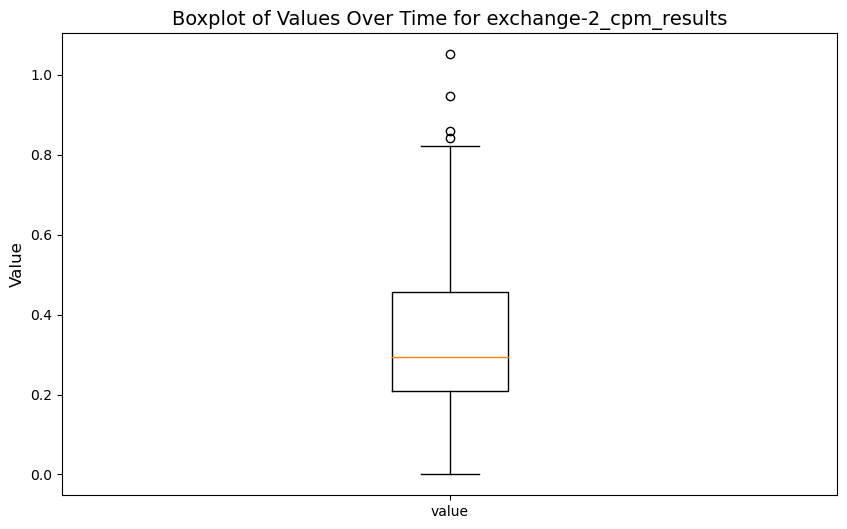

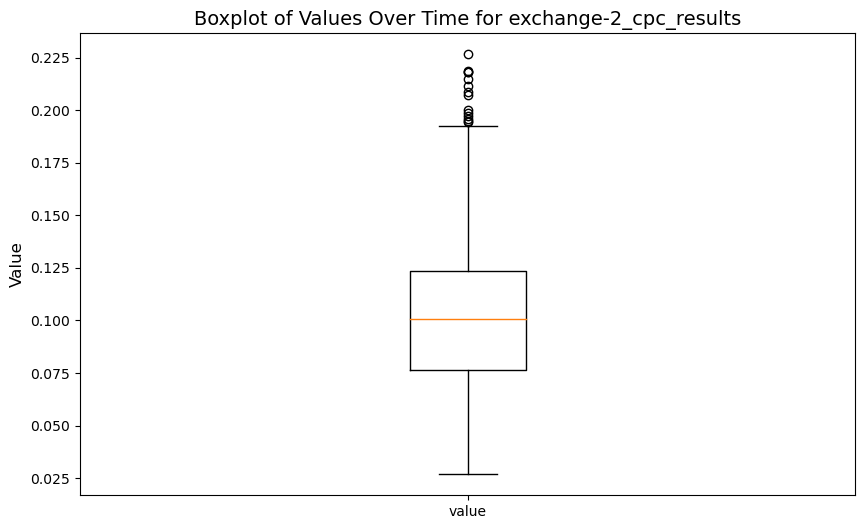

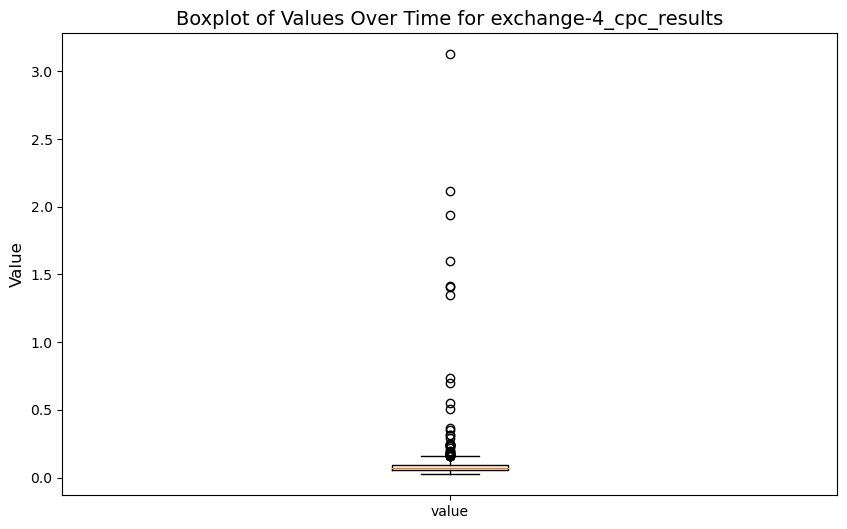

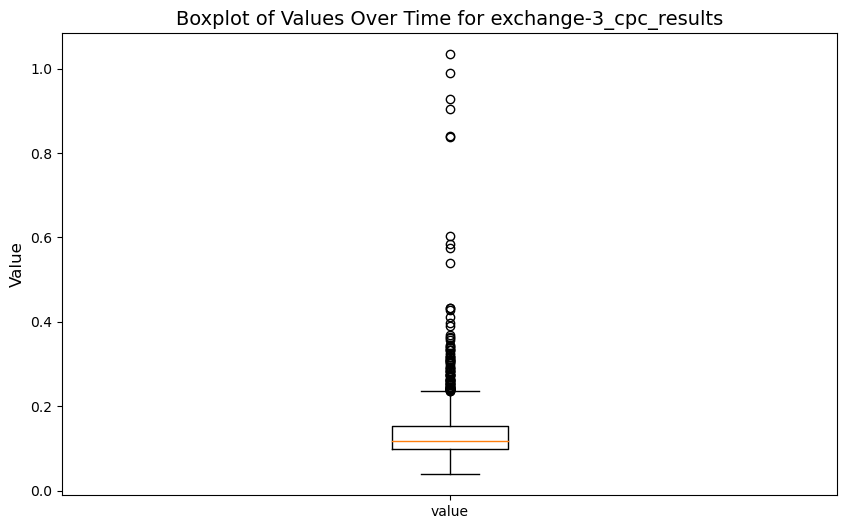

In [4]:
#become a list of file names from collection
csv_files = glob.glob("NAB/realAdExchange/*.csv")
file_names = [os.path.splitext(os.path.basename(file))[0] for file in csv_files]

#create a boxplot using a predefined function for each file in the 'file_names'.
for file_name in file_names:
    df = pd.read_csv(f'NAB/realAdExchange/{file_name}.csv')
    create_vertical_boxplot_with_legend(df, 'value', file_name)

RealAWSCloudwatch collection

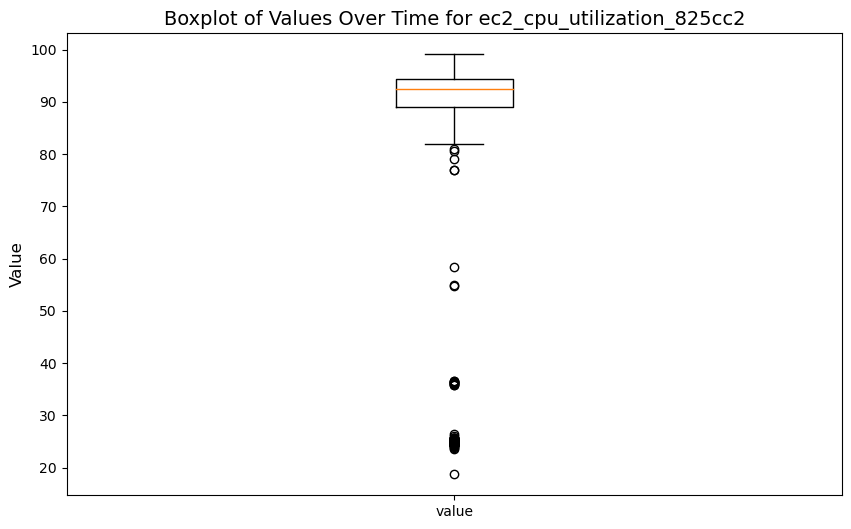

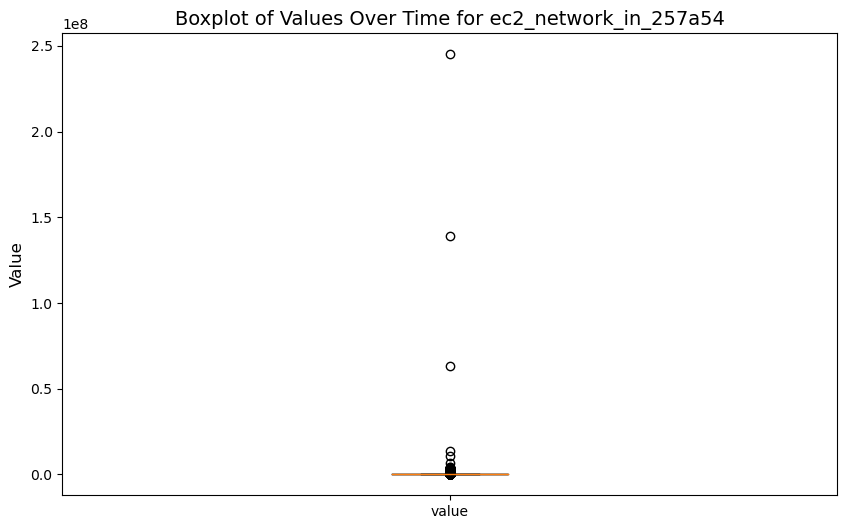

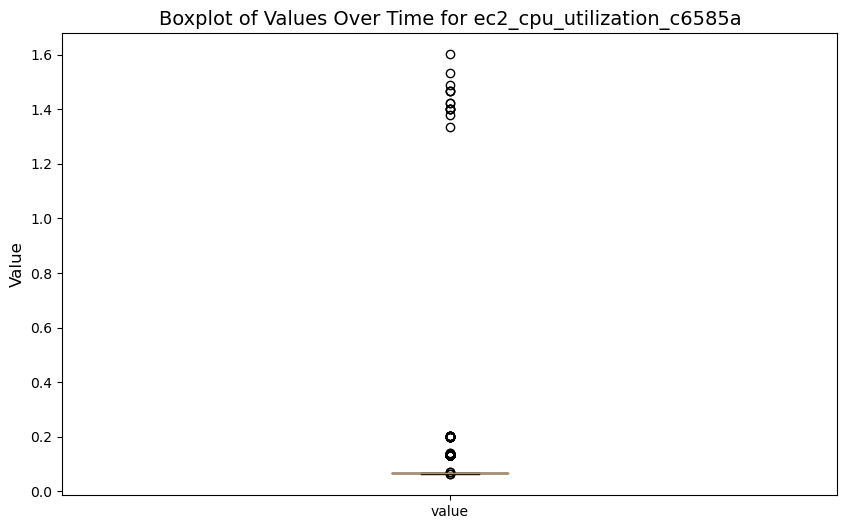

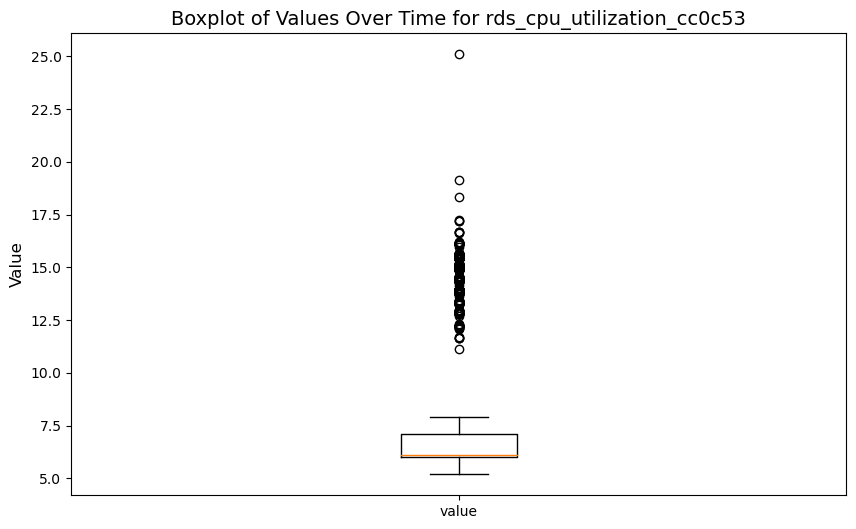

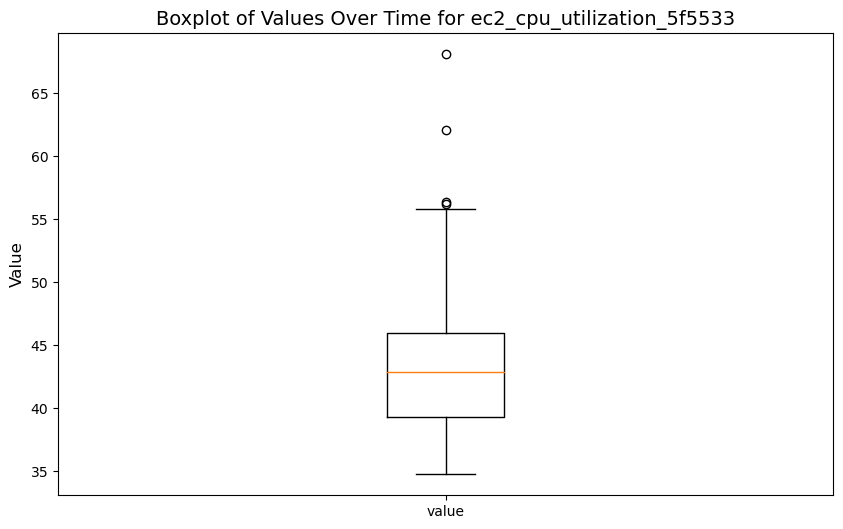

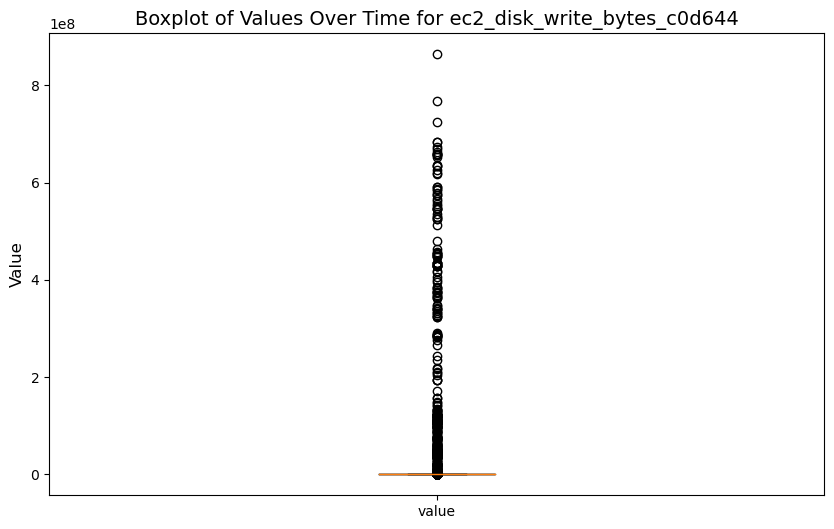

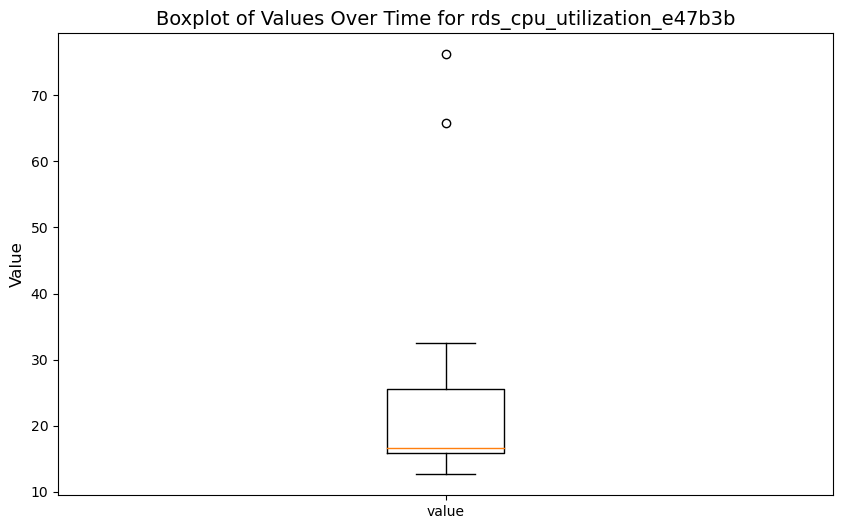

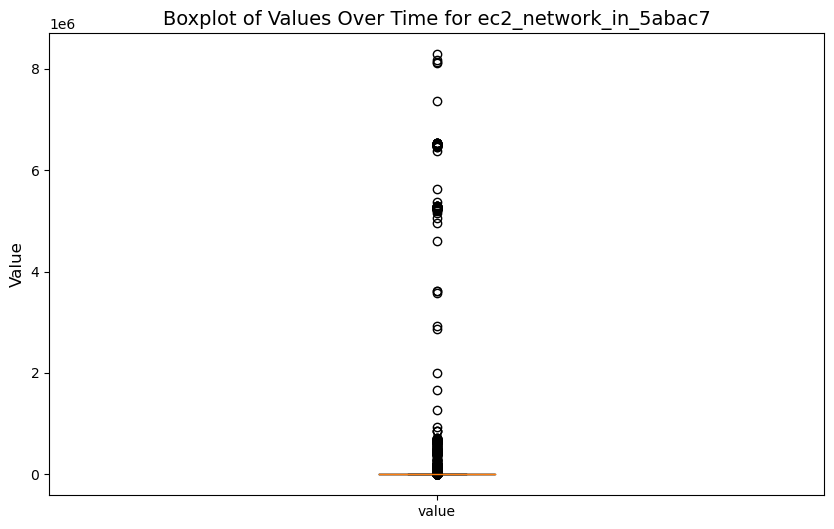

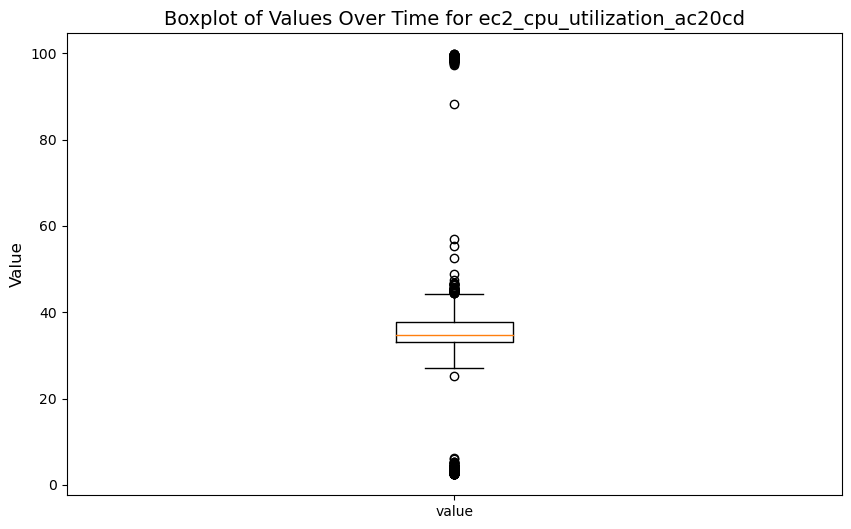

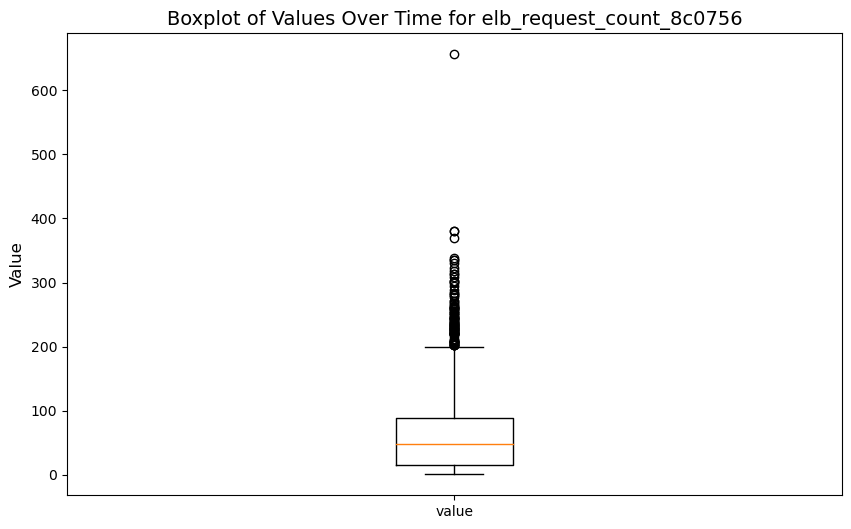

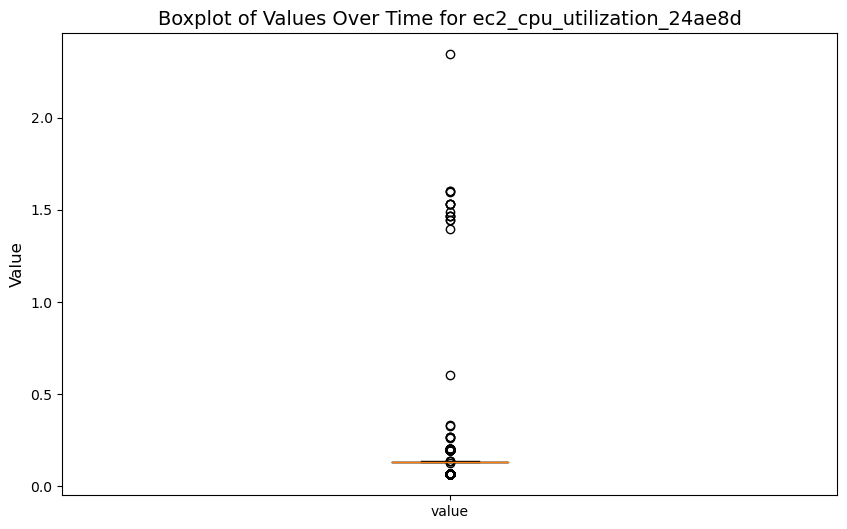

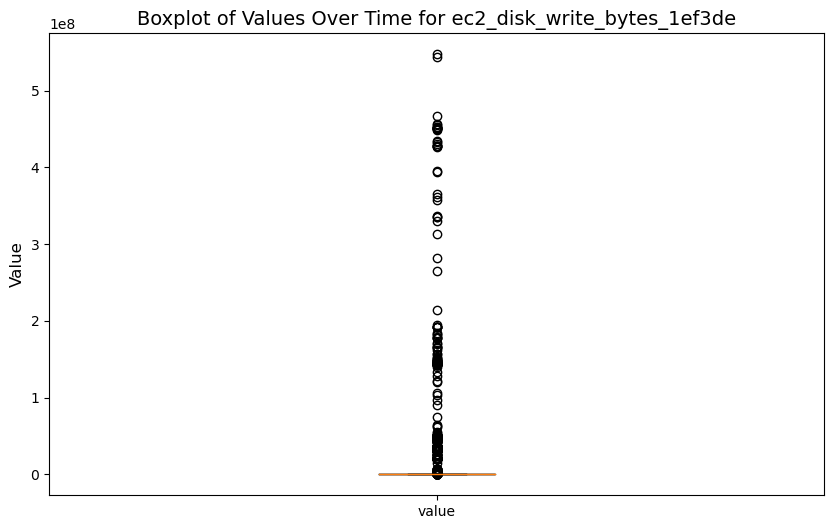

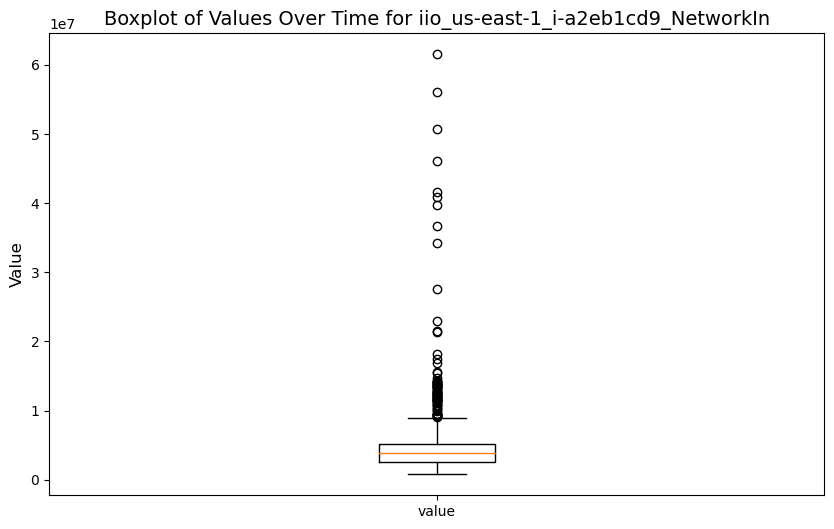

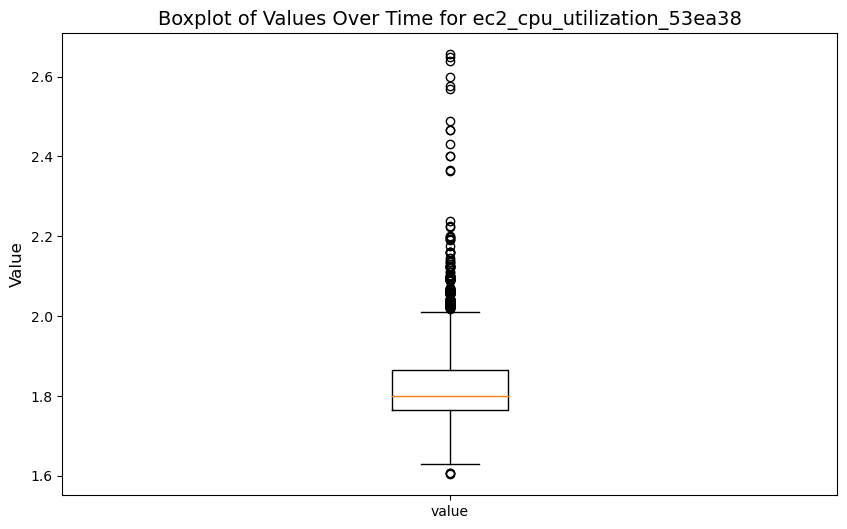

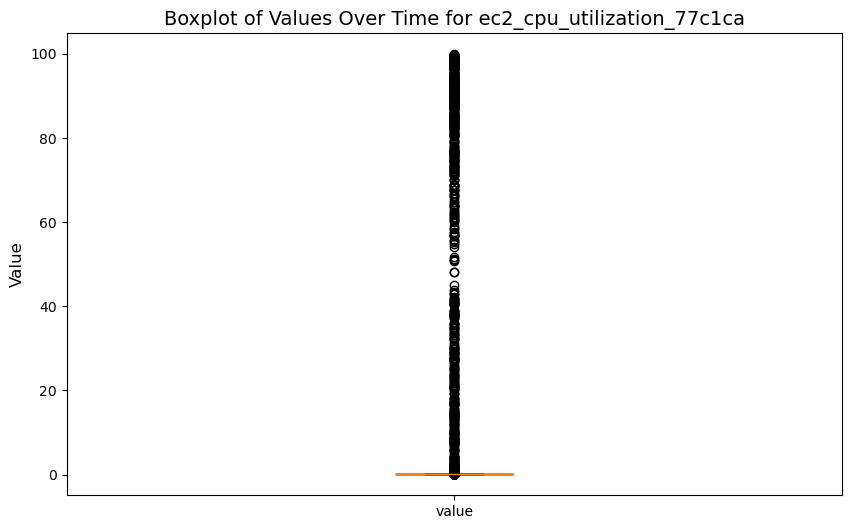

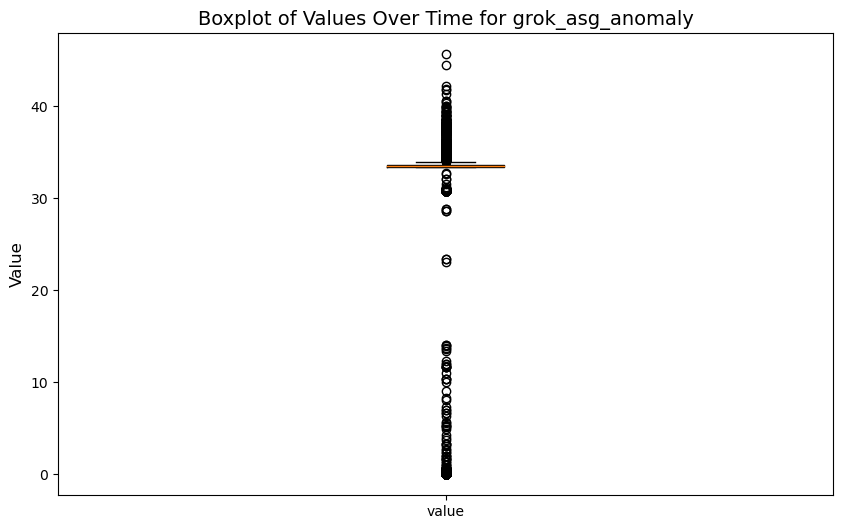

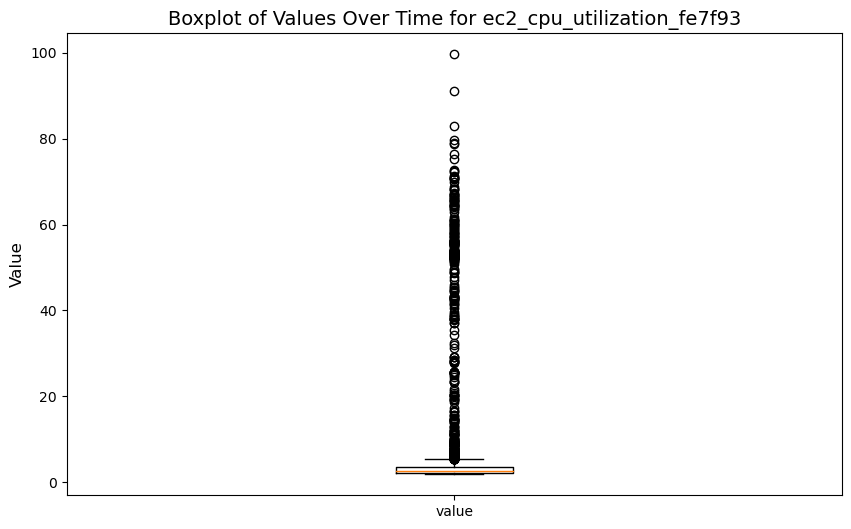

In [5]:
#become a list of file names from collection
csv_files = glob.glob("NAB/realAWSCloudwatch/*.csv")
file_names = [os.path.splitext(os.path.basename(file))[0] for file in csv_files]

#create a boxplot using a predefined function for each file in the 'file_names'.
for file_name in file_names:
    df = pd.read_csv(f'NAB/realAWSCloudwatch/{file_name}.csv')
    create_vertical_boxplot_with_legend(df, 'value', file_name)

RealKnownCause collection

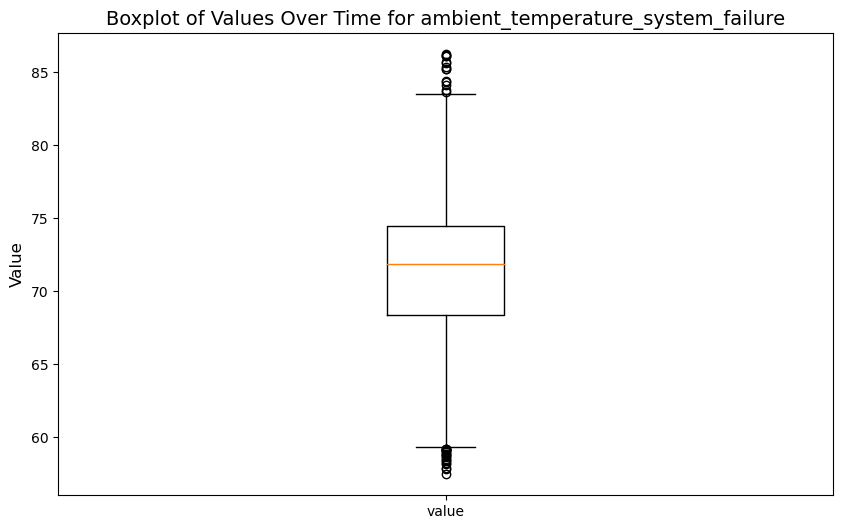

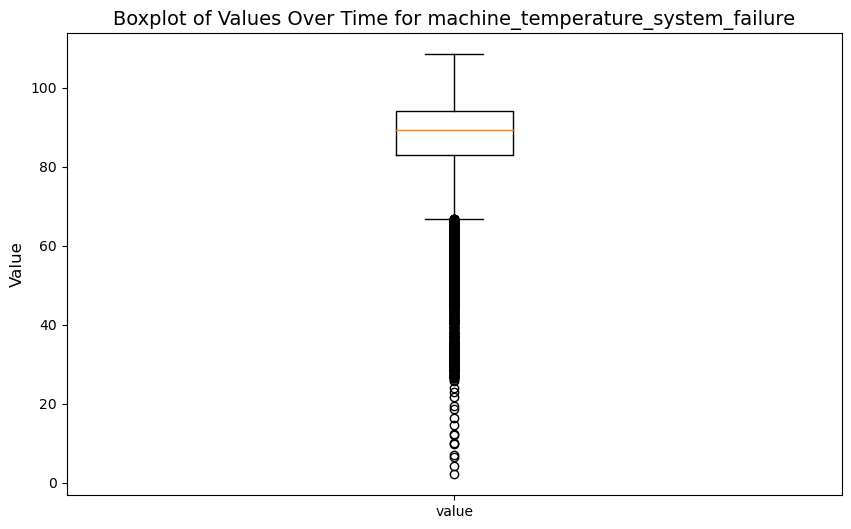

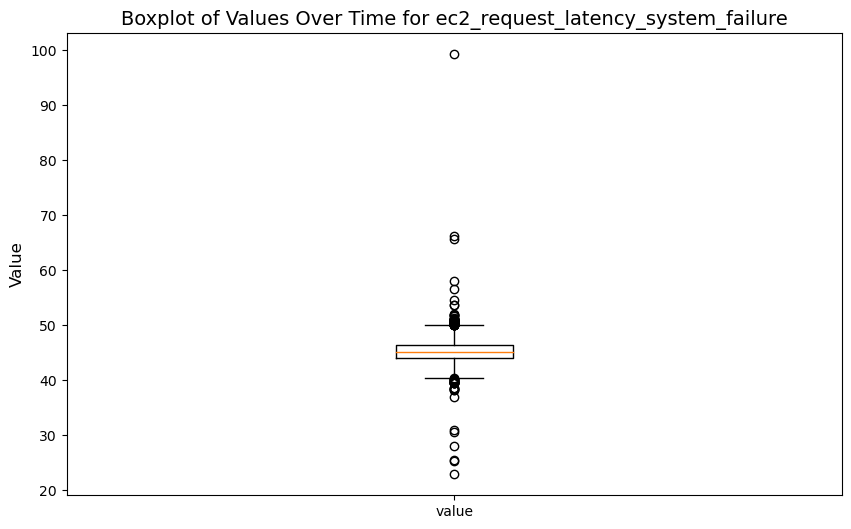

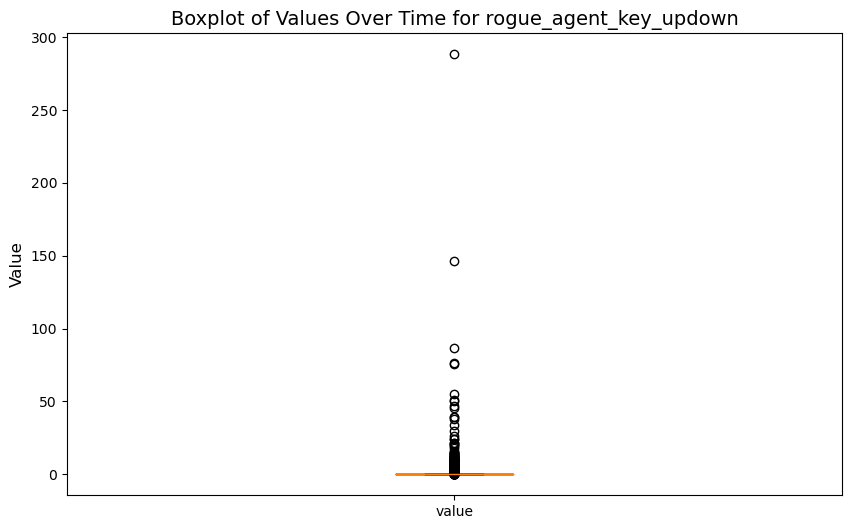

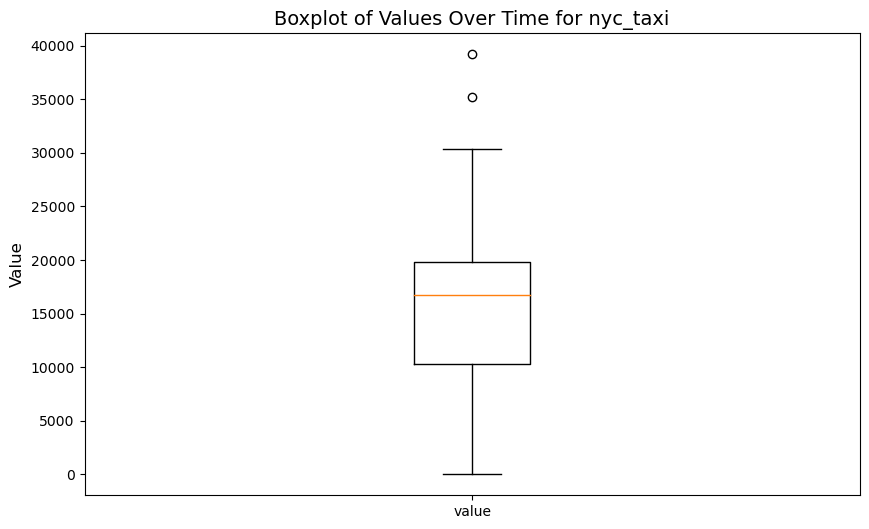

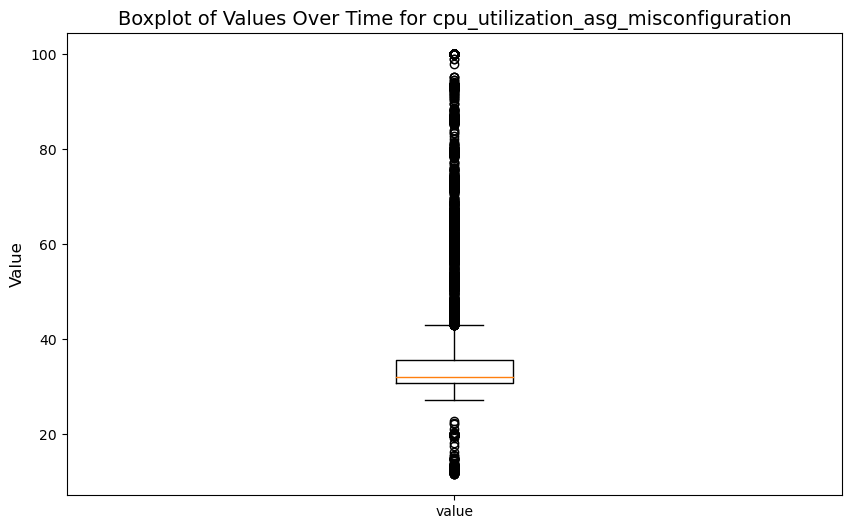

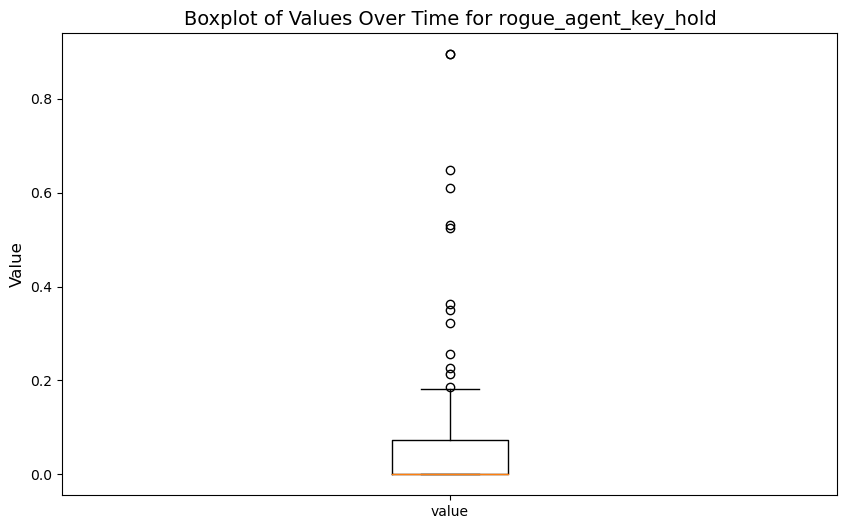

In [6]:
#become a list of file names from collection
csv_files = glob.glob("NAB/realKnownCause/*.csv")
file_names = [os.path.splitext(os.path.basename(file))[0] for file in csv_files]

#create a boxplot using a predefined function for each file in the 'file_names'.
for file_name in file_names:
    df = pd.read_csv(f'NAB/realKnownCause/{file_name}.csv')
    create_vertical_boxplot_with_legend(df, 'value', file_name)

RealTraffic collection

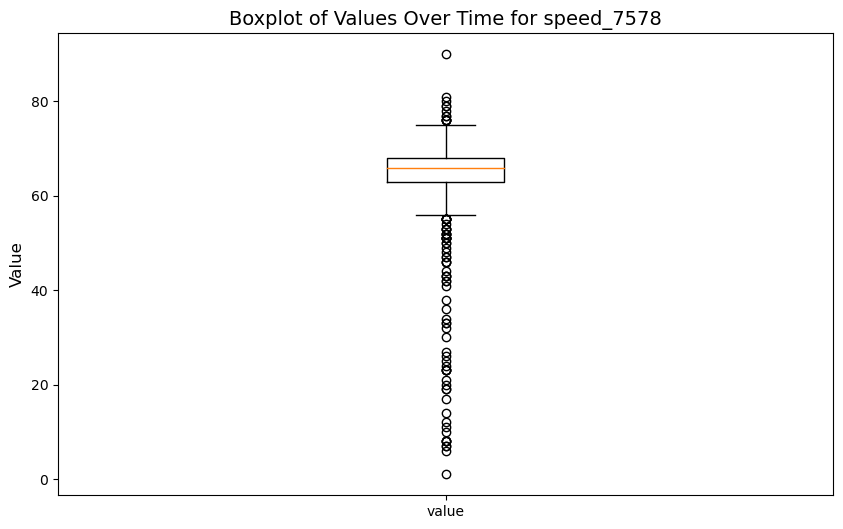

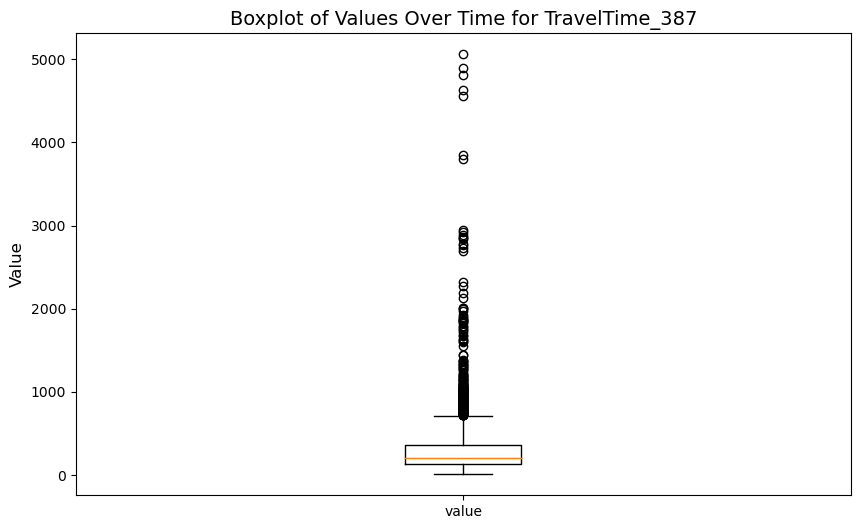

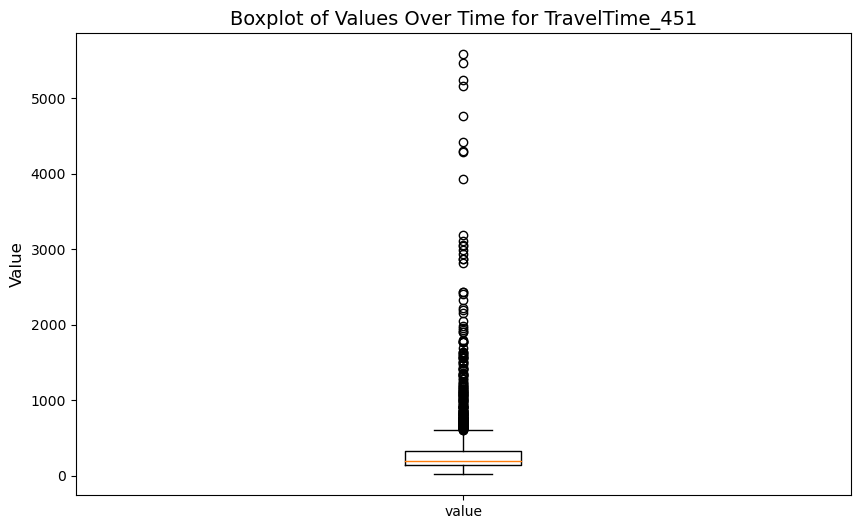

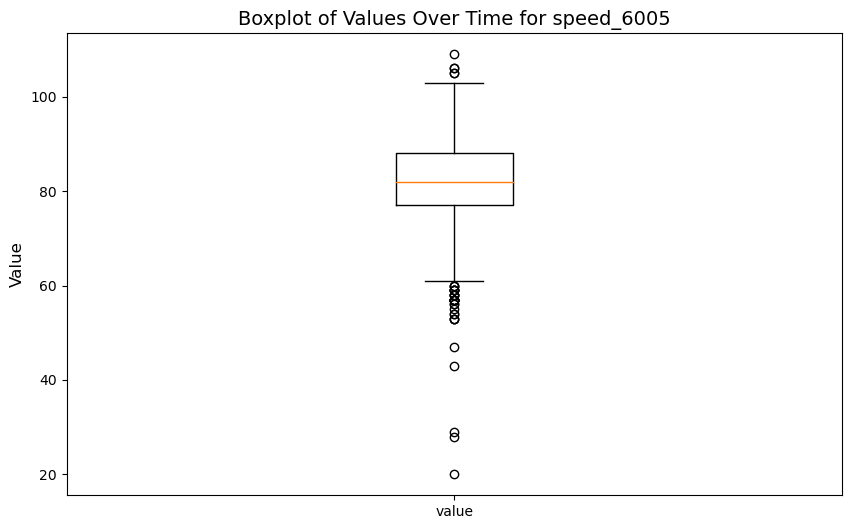

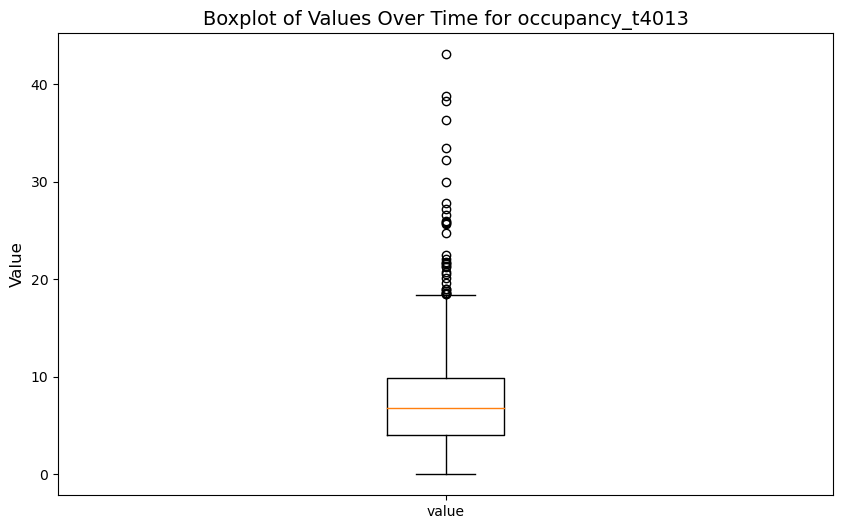

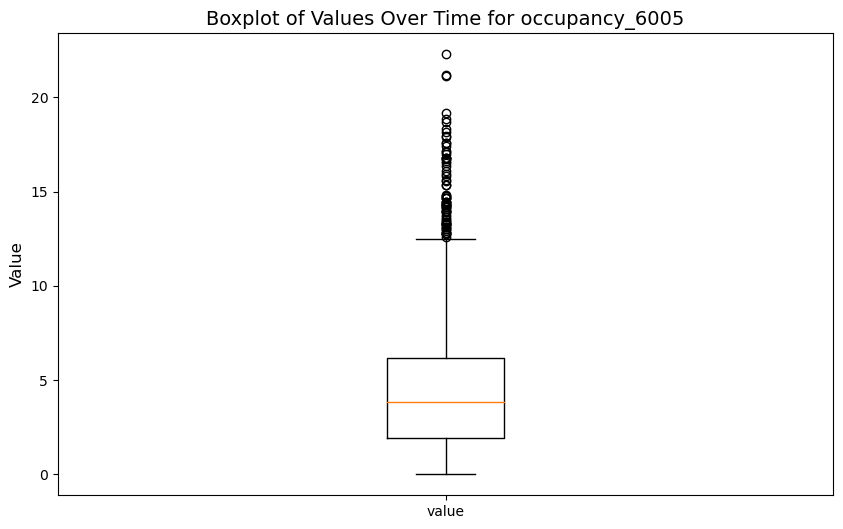

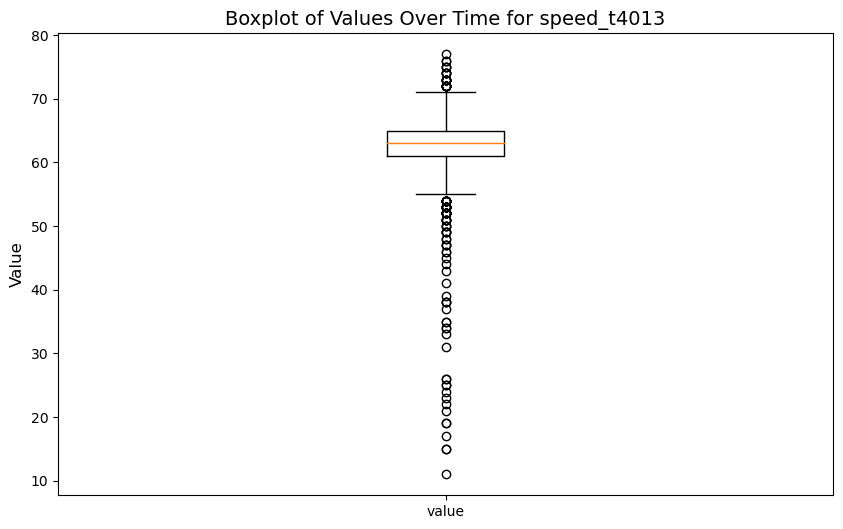

In [7]:
#become a list of file names from collection
csv_files = glob.glob("NAB/realTraffic/*.csv")
file_names = [os.path.splitext(os.path.basename(file))[0] for file in csv_files]

#create a boxplot using a predefined function for each file in the 'file_names'.
for file_name in file_names:
    df = pd.read_csv(f'NAB/realTraffic/{file_name}.csv')
    create_vertical_boxplot_with_legend(df, 'value', file_name)

RealTweets collection

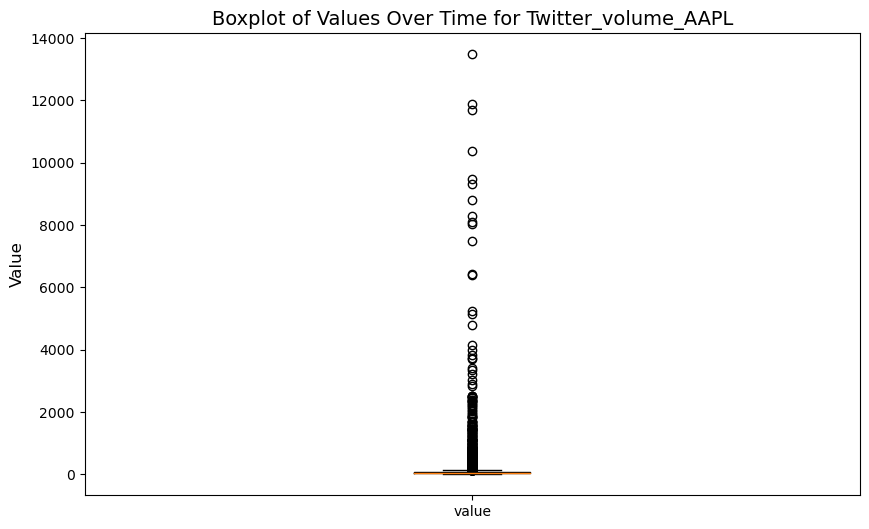

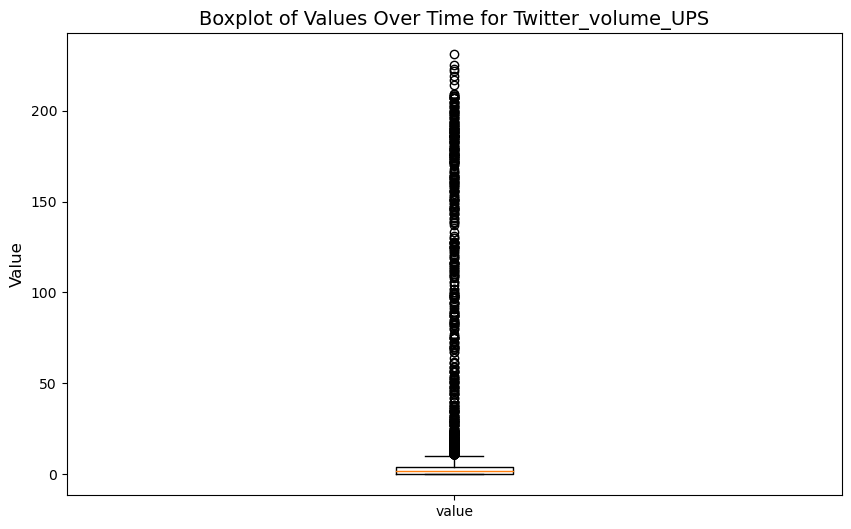

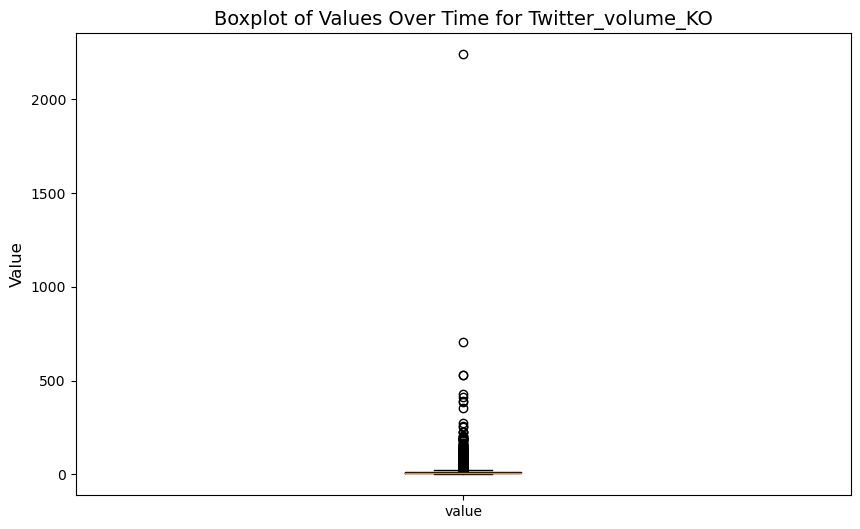

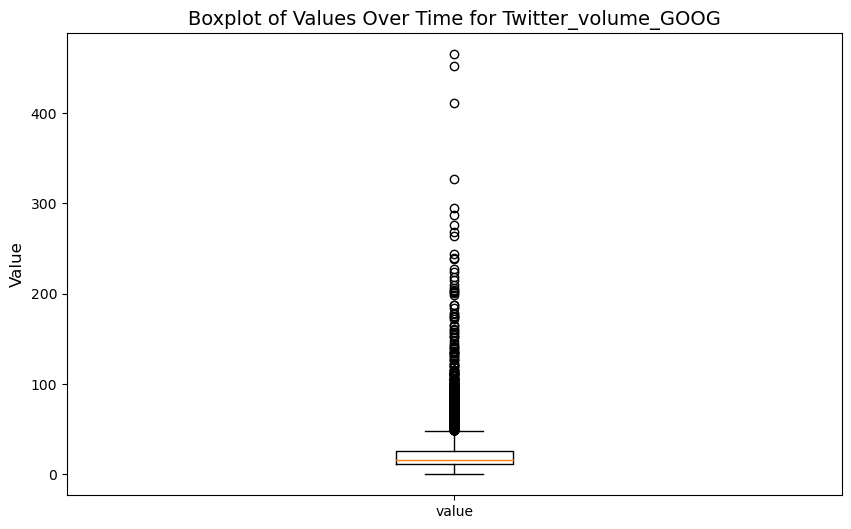

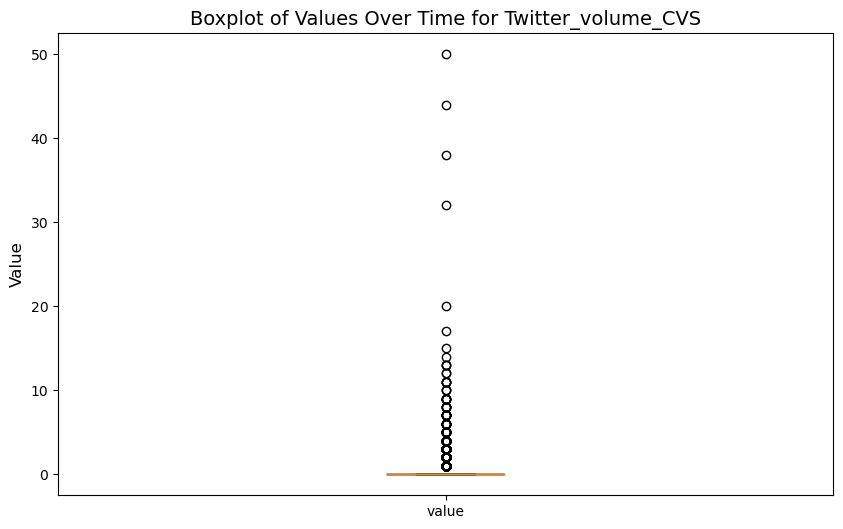

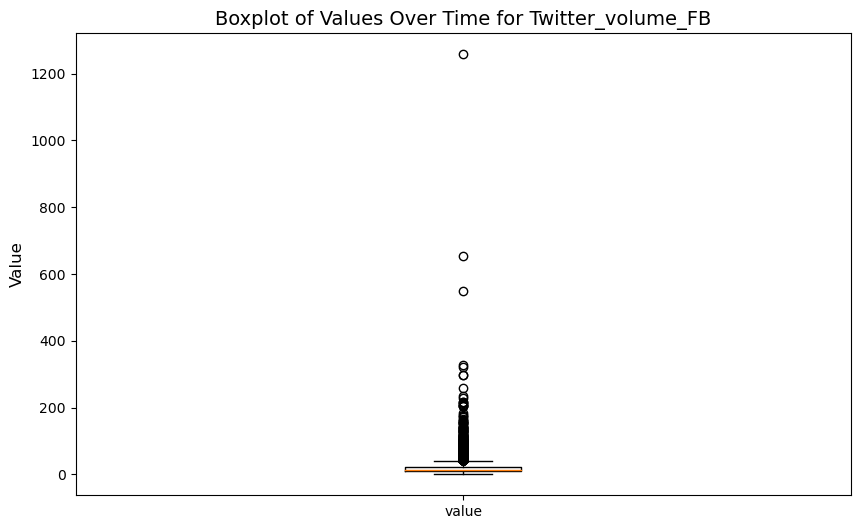

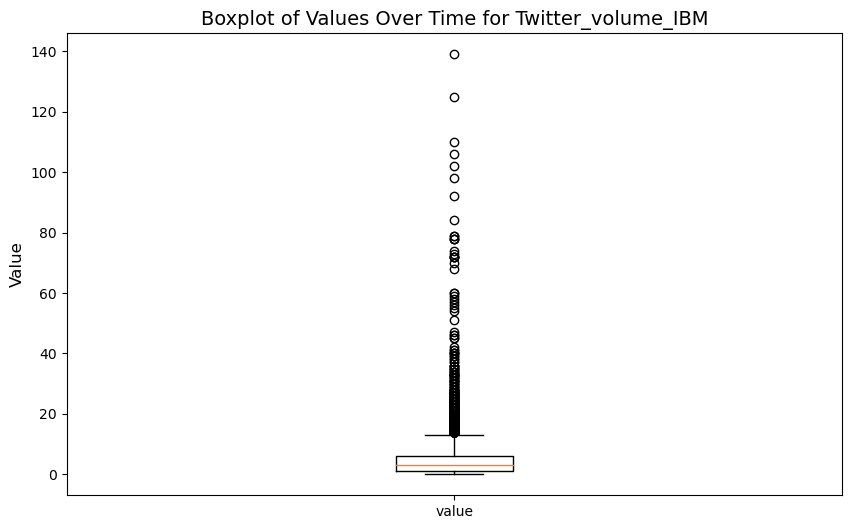

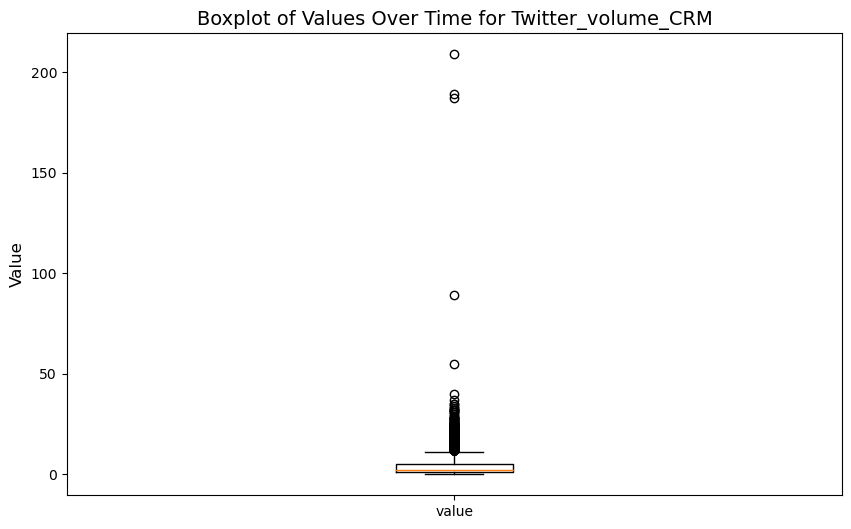

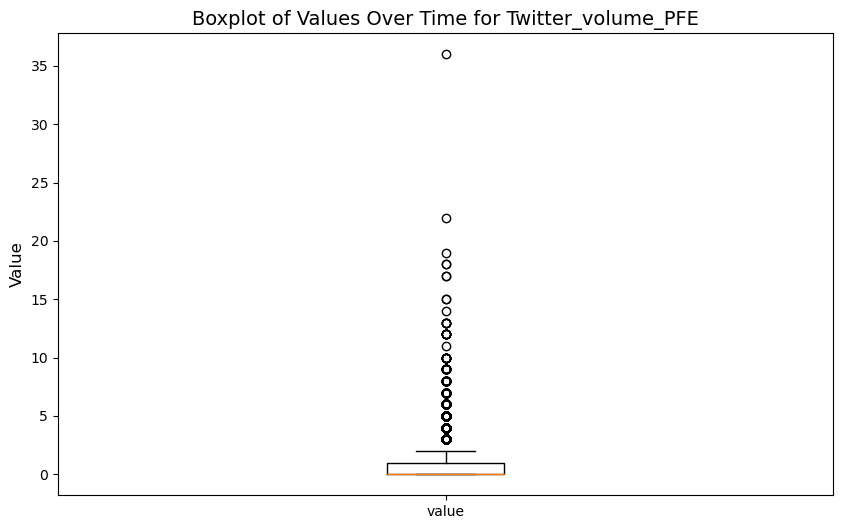

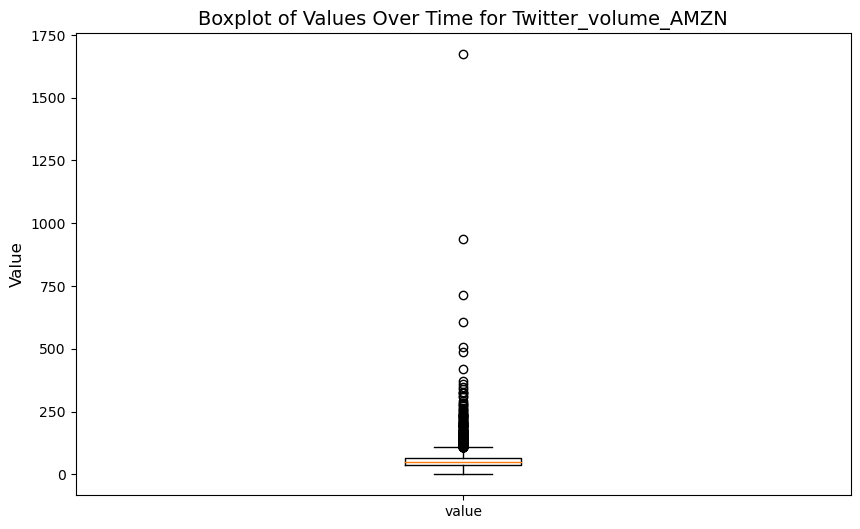

In [8]:
#become a list of file names from collection
csv_files = glob.glob("NAB/realTweets/*.csv")
file_names = [os.path.splitext(os.path.basename(file))[0] for file in csv_files]

#create a boxplot using a predefined function for each file in the 'file_names'.
for file_name in file_names:
    df = pd.read_csv(f'NAB/realTweets/{file_name}.csv')
    create_vertical_boxplot_with_legend(df, 'value', file_name)

## Weather dataset

### Temperature collection

Prepare raw temperature data and create a boxplot.

In [9]:
#read the raw data from a .txt file with a specified separator (';')
temperature = pd.read_csv('Weather_raw/produkt_tu_stunde_19610101_20221231_00282.txt', sep=';')

#convert the 'MESS_DATUM' column to datetime format using the specified format
temperature['MESS_DATUM'] = pd.to_datetime(temperature['MESS_DATUM'], format='%Y%m%d%H')

#delete the unnecessary columns from the DataFrame
columns_drop = ['STATIONS_ID','QN_9','RF_TU','eor']
temperature = temperature.drop(columns_drop, axis=1)

#filter out rows with missing values
temperature = temperature[temperature['TT_TU'] != -999]
temperature.head()

,MESS_DATUM,TT_TU
0,1961-01-01 01:00:00,0.8
1,1961-01-01 02:00:00,0.8
2,1961-01-01 03:00:00,0.9
3,1961-01-01 04:00:00,0.9
4,1961-01-01 05:00:00,0.9


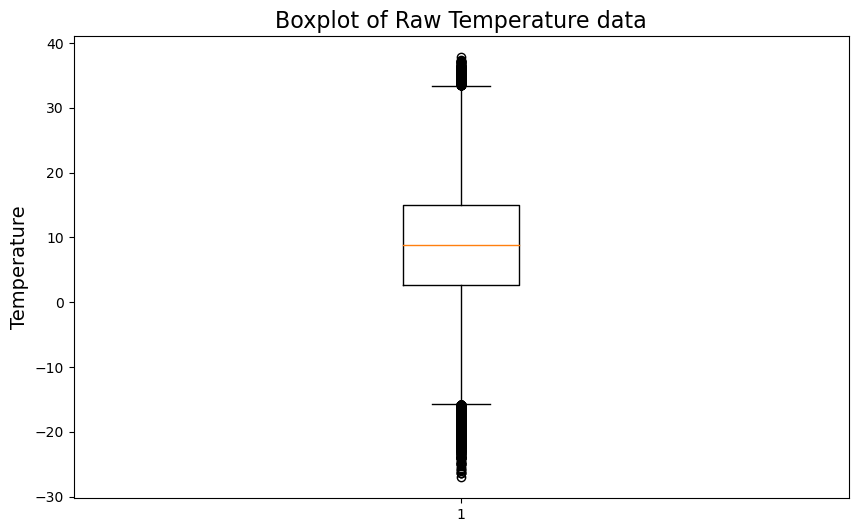

In [10]:
#create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(temperature['TT_TU'], vert=True)
plt.ylabel('Temperature',size=14)

plt.title(f'Boxplot of Raw Temperature data',size=16)
plt.show()

Create boxplots for decades and test signals for a temperature collection. 

The signals are stored in the 'Temperature' folder and were prepared in the 'Prepare Temperature Data' notebook (temperature_data_prep.ipynb).

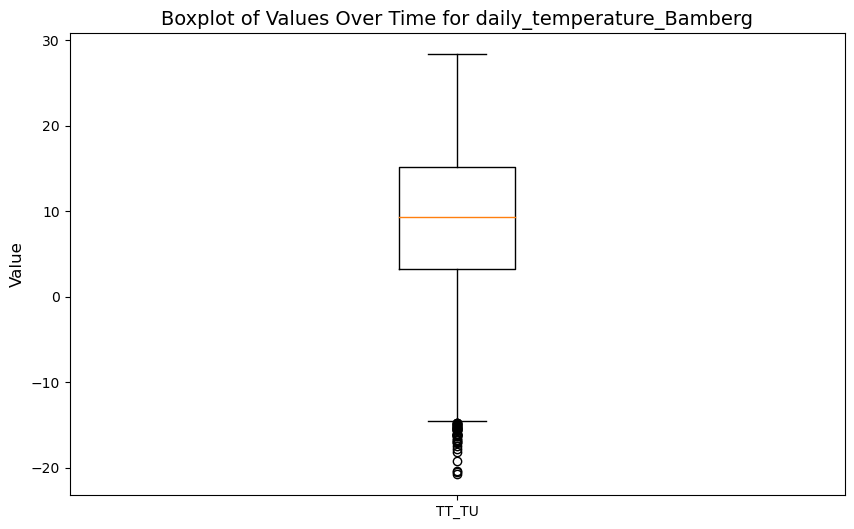

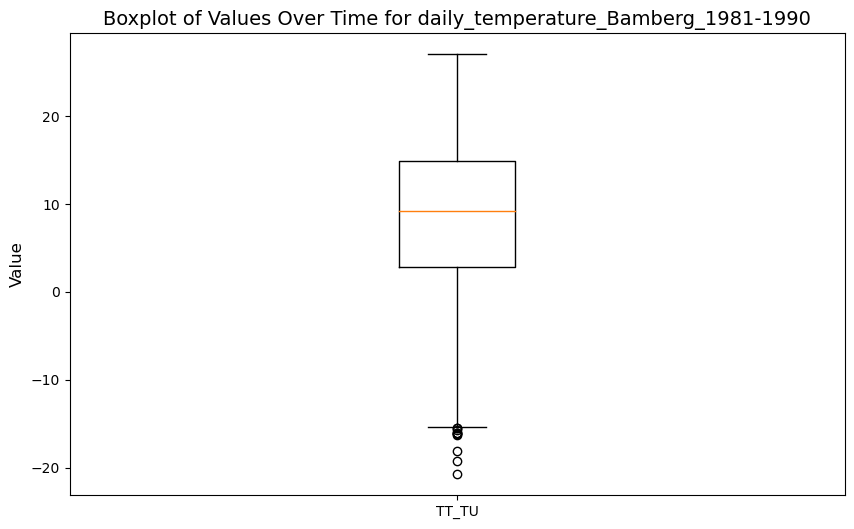

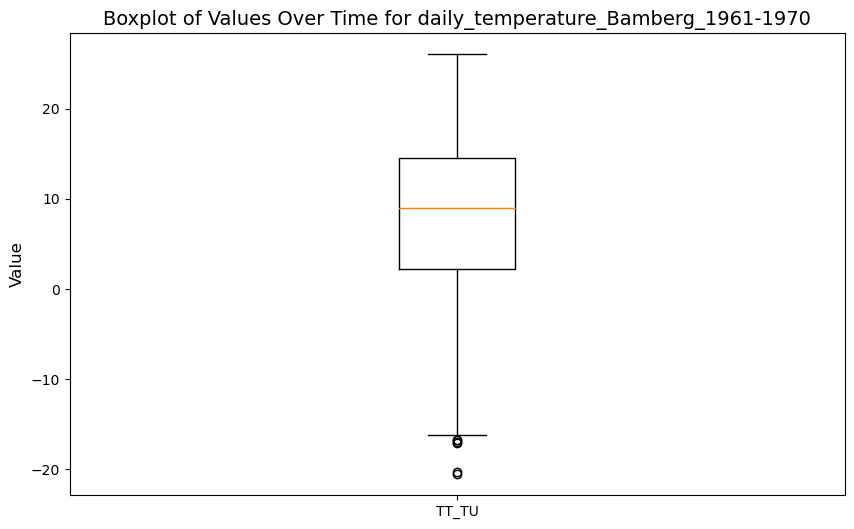

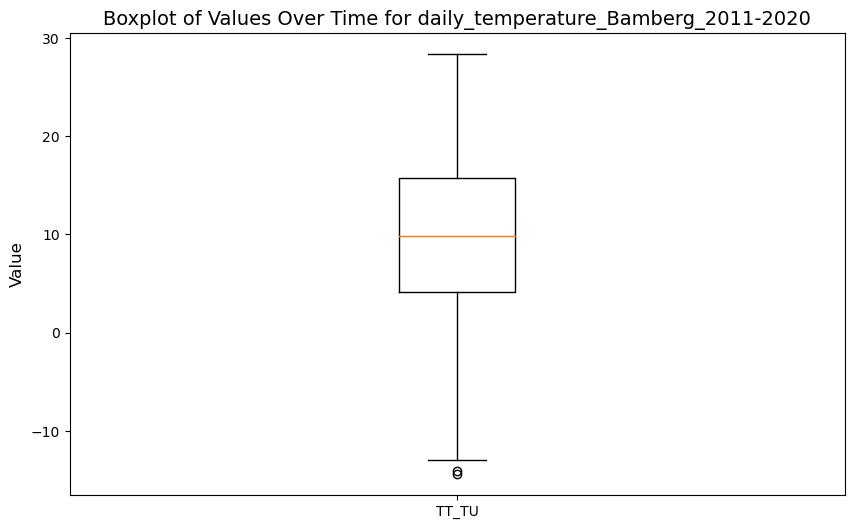

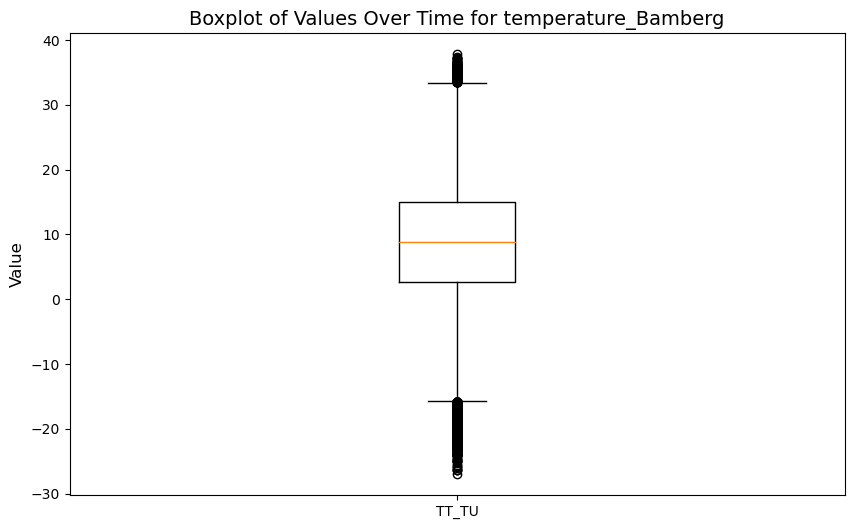

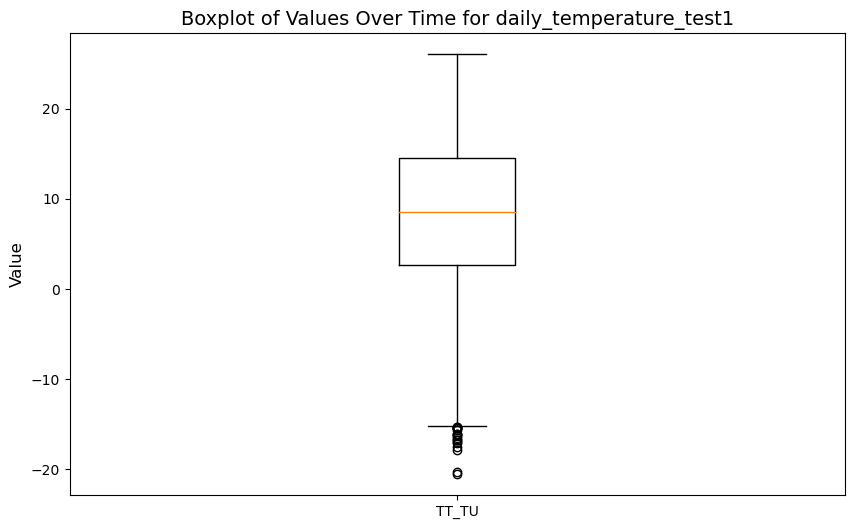

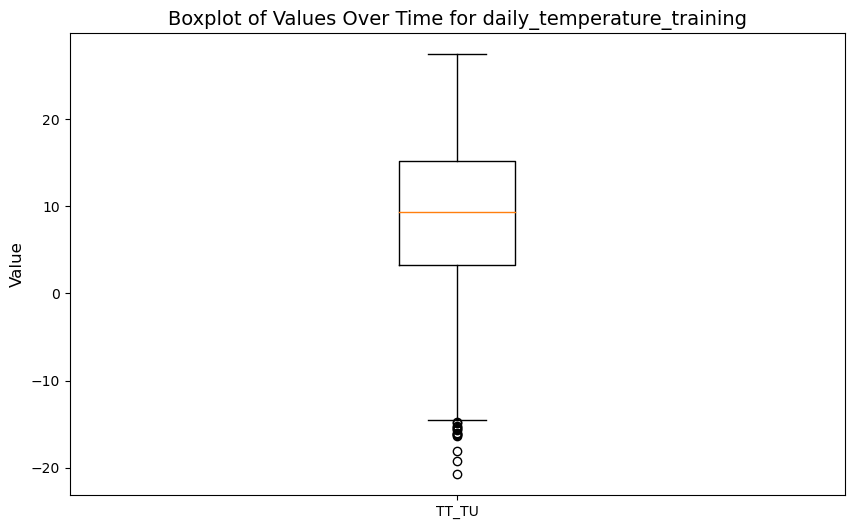

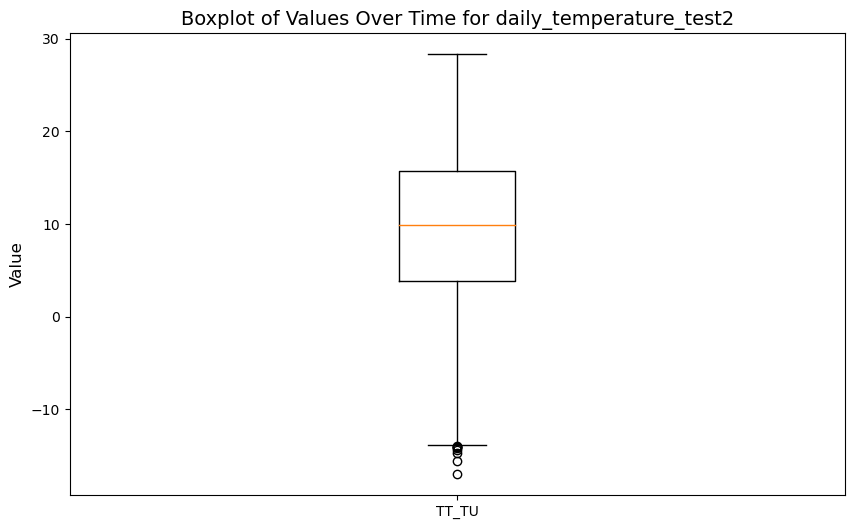

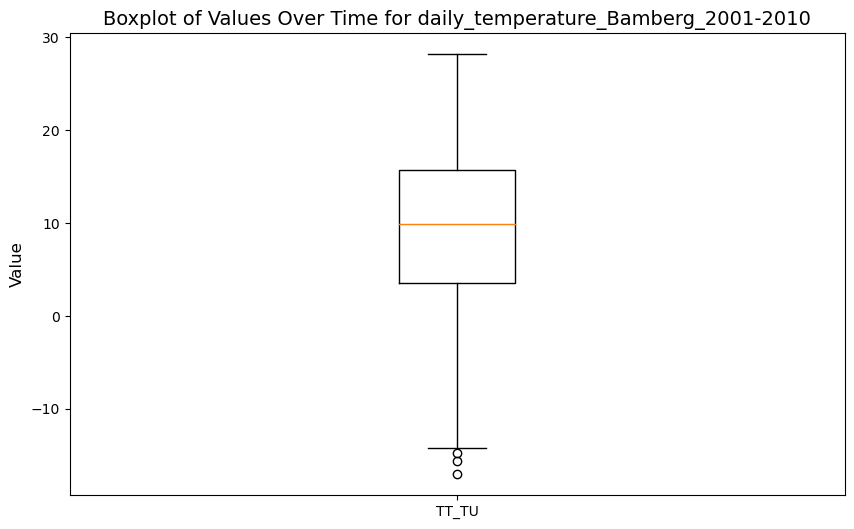

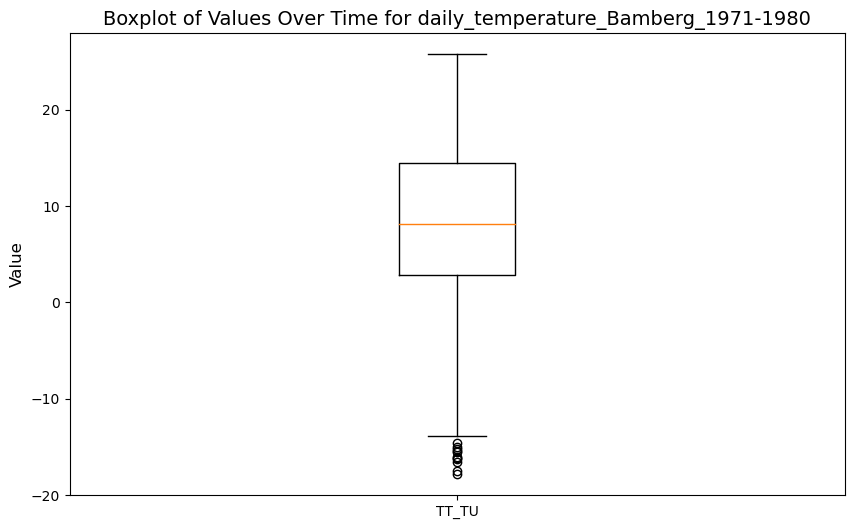

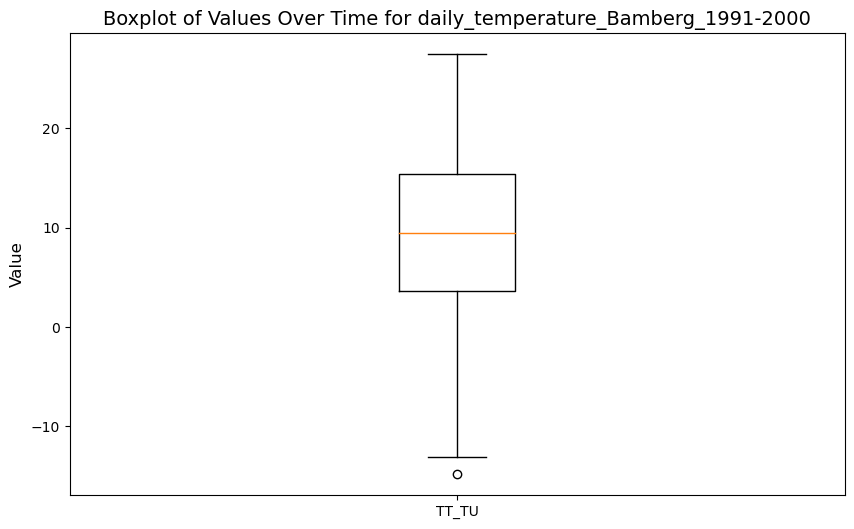

In [5]:
#become a list of file names
csv_files = glob.glob("Temperature/*.csv")
file_names = [os.path.splitext(os.path.basename(file))[0] for file in csv_files]

for file_name in file_names:
    df = pd.read_csv(f'Temperature/{file_name}.csv')
    #check missing values
    missing_values = df['TT_TU'].isna()

    #count missing values per column
    missing_count = missing_values.sum()

    #impute missing values using an interpolation method if necessary
    if missing_count >=1:
        df['TT_TU'].interpolate(inplace=True)
        
    #create a boxplot using a predefined function
    create_vertical_boxplot_with_legend(df, 'TT_TU', file_name)

### Pressure collection

In [11]:
#read the raw data from a .txt file with a specified separator (';')
pressure = pd.read_csv('Weather_raw/produkt_p0_stunde_19490101_20221231_00282.txt', sep=';')

#convert the 'MESS_DATUM' column to datetime format using the specified format
pressure['MESS_DATUM'] = pd.to_datetime(pressure['MESS_DATUM'], format='%Y%m%d%H')

#delete the unnecessary columns from the DataFrame
columns_drop = ['STATIONS_ID','QN_8','P0','eor']
pressure = pressure.drop(columns_drop, axis=1)

#filter out rows with missing values
pressure = pressure[pressure['P'] != -999]
pressure.head()

,MESS_DATUM,P
0,1949-01-01 00:00:00,1006.3
1,1949-01-01 03:00:00,1004.7
2,1949-01-01 06:00:00,1001.6
3,1949-01-01 09:00:00,1000.3
4,1949-01-01 12:00:00,996.7


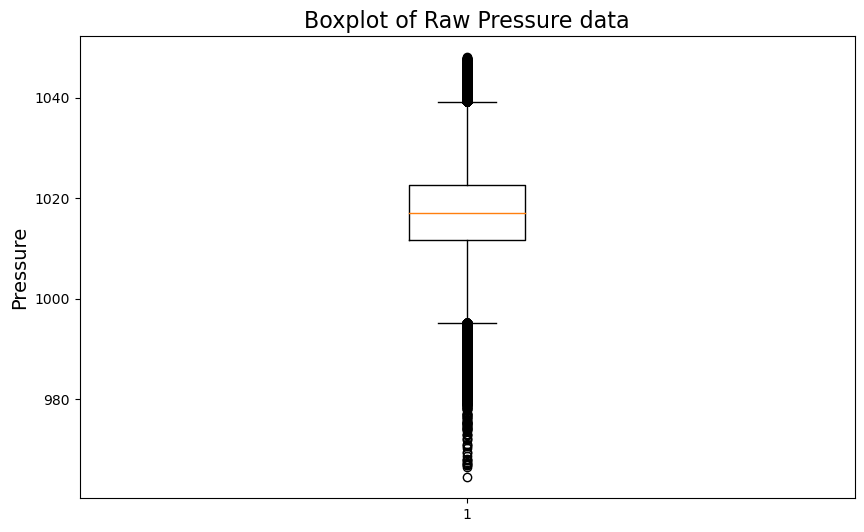

In [13]:
#create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(pressure['P'], vert=True)
plt.ylabel('Pressure',size=14)
plt.title(f'Boxplot of Raw Pressure data',size=16)
plt.show()

Create boxplots for decades and test signals for a pressure collection. 

The signals are stored in the 'Pressure' folder and were prepared in the 'Prepare Temperature Data' notebook (pressure_data_prep.ipynb).

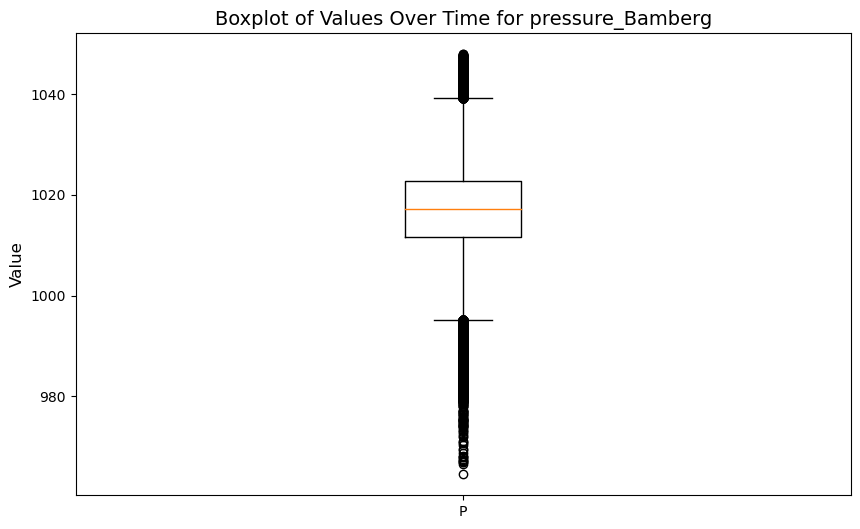

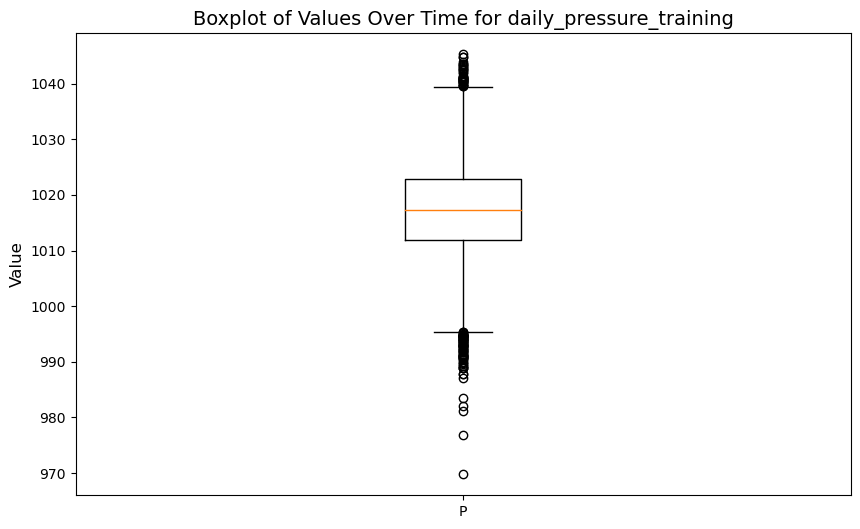

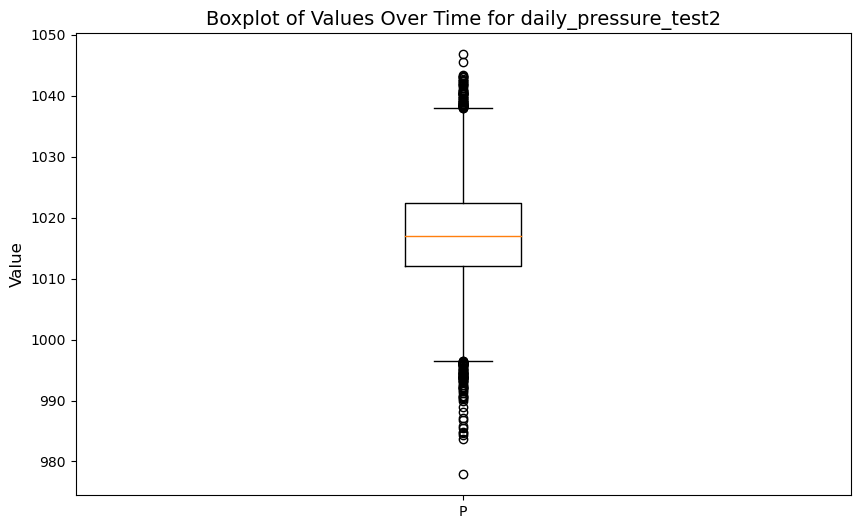

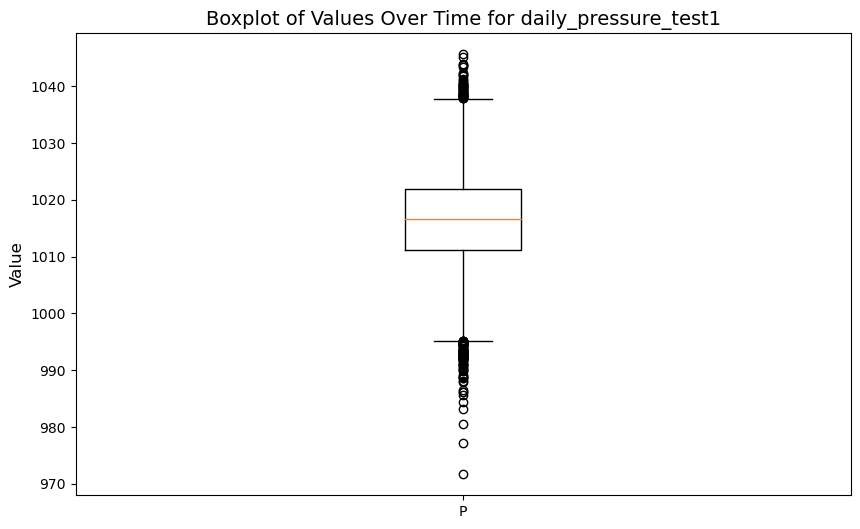

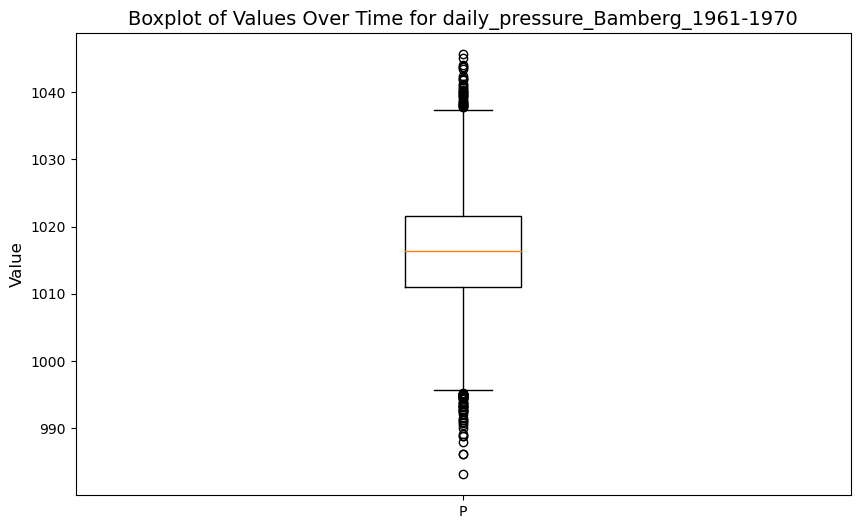

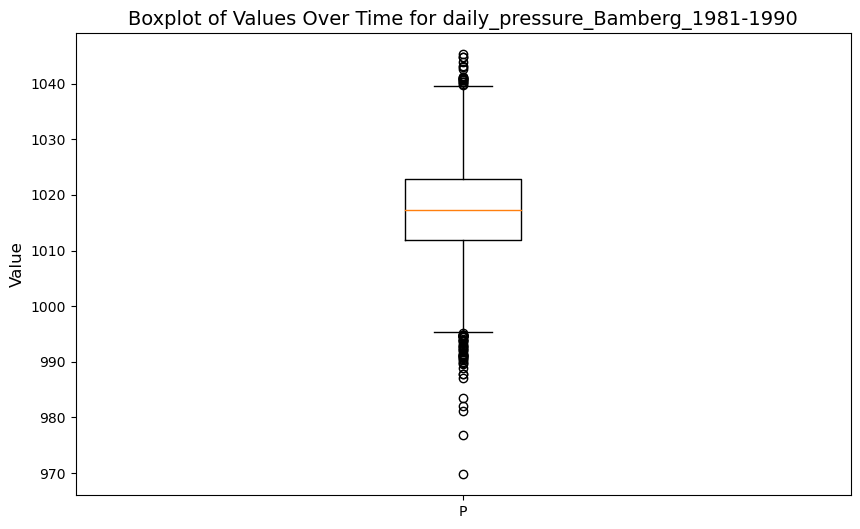

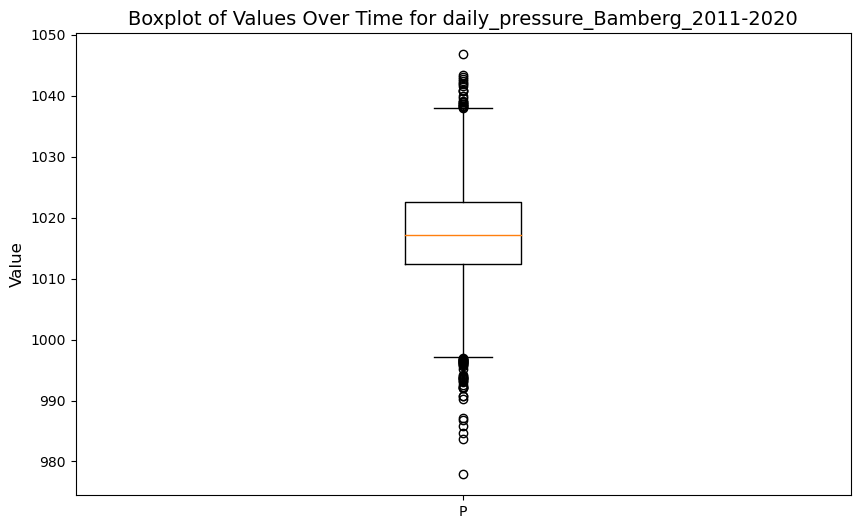

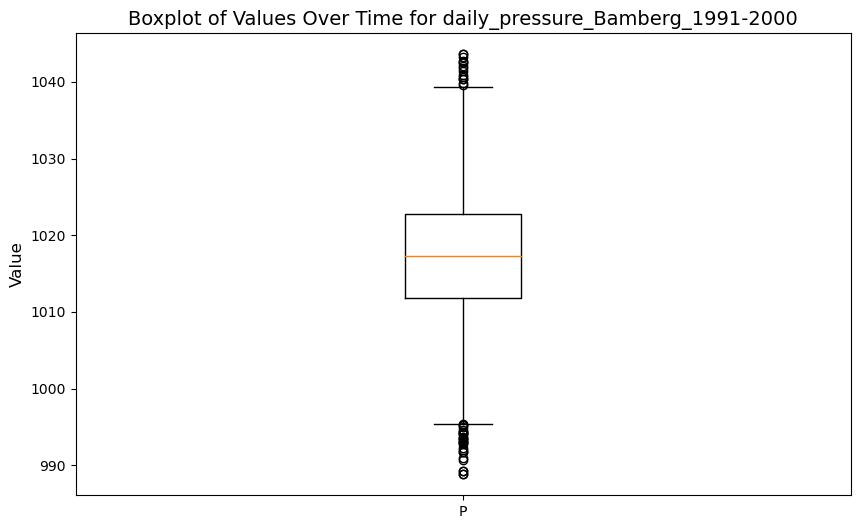

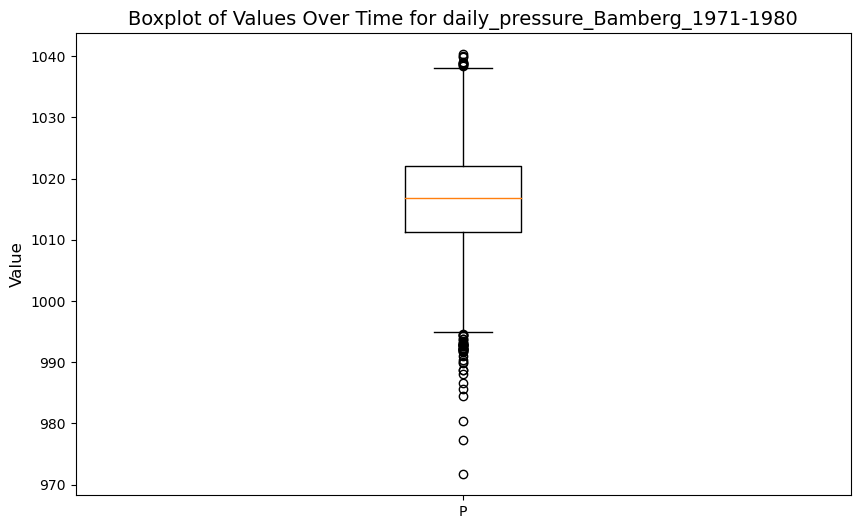

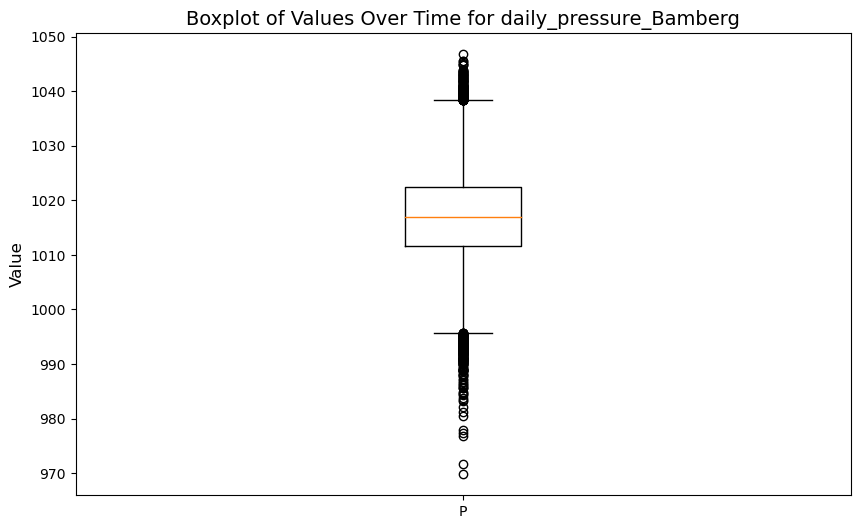

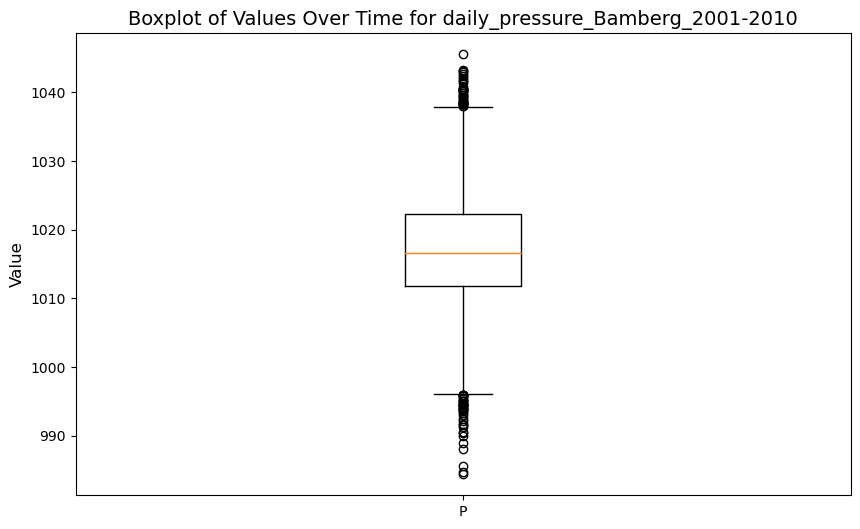

In [6]:
#become file lists
csv_files = glob.glob("Pressure/*.csv")
file_names = [os.path.splitext(os.path.basename(file))[0] for file in csv_files]

for file_name in file_names:
    df = pd.read_csv(f'Pressure/{file_name}.csv')
    #check missing values
    missing_values = df['P'].isna() 
    
    #count missing values per column
    missing_count = missing_values.sum()
    
    #impute missing values using an interpolation method if necessary
    if missing_count >=1:
        df['P'].interpolate(inplace=True)

    #create a boxplot using a predefined function 
    create_vertical_boxplot_with_legend(df, 'P', file_name)